# **Used car price prediction**

## Miralireza Nabavi

In [12]:
### imports
import numpy as np
import pandas as pd
import math
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [13]:
cd = pd.read_csv("usedcars.csv")
cd.head(10)

,price,trim,isOneOwner,mileage,year,color,displacement,fuel,region,soundSystem,wheelType
0,2988,320,f,193296.0,1995,Black,3.2,Gasoline,SoA,unsp,Alloy
1,6595,320,f,129948.0,1995,other,3.2,Gasoline,Mid,Premium,Alloy
2,7993,320,f,140428.0,1997,White,3.2,Gasoline,Mid,Bose,Alloy
3,5995,420,f,113622.0,1999,Silver,4.2,Gasoline,Mid,unsp,Alloy
4,3000,420,f,167673.0,1999,Silver,4.2,Gasoline,SoA,unsp,Alloy
5,7400,430,f,82419.0,2002,White,4.3,Gasoline,Mid,Bose,Alloy
6,10850,430,f,101264.0,2000,White,4.3,Gasoline,SoA,unsp,unsp
7,8990,430,f,110651.0,2001,Black,4.3,Gasoline,SoA,unsp,Alloy
8,7950,430,f,108173.0,2000,Silver,4.3,Gasoline,ESC,Bose,unsp
9,7995,430,f,119978.0,2000,Black,4.3,Gasoline,ESC,unsp,Alloy


In [14]:
cd.describe()

,price,mileage,year,displacement
count,20063.000000,20063.000000,20063.000000,20063.000000
mean,30747.243682,73113.478842,2007.010018,5.058964
std,18291.084516,43075.536515,4.128162,0.628131
min,599.000000,8.000000,1994.000000,3.000000
25%,13495.000000,39888.500000,2004.000000,4.600000
50%,29454.000000,67187.000000,2007.000000,5.500000
75%,43995.000000,98213.000000,2010.000000,5.500000
max,79999.000000,488525.000000,2014.000000,6.300000


In [15]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20063 entries, 0 to 20062
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         20063 non-null  int64  
 1   trim          20063 non-null  object 
 2   isOneOwner    20063 non-null  object 
 3   mileage       20063 non-null  float64
 4   year          20063 non-null  int64  
 5   color         20063 non-null  object 
 6   displacement  20063 non-null  float64
 7   fuel          20063 non-null  object 
 8   region        20063 non-null  object 
 9   soundSystem   20063 non-null  object 
 10  wheelType     20063 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1.7+ MB


In [16]:
print('The size of the data is',cd.shape)

The size of the data is (20063, 11)


In [17]:
cd['trim'].value_counts()

550       11825
430        2787
500        2661
63 AMG      599
600         572
55 AMG      356
350         352
320         274
420         239
400         220
65 AMG      178
Name: trim, dtype: int64

In [18]:
cd['isOneOwner'].value_counts()

f    16594
t     3469
Name: isOneOwner, dtype: int64

In [19]:
cd['color'].value_counts()

Black     8194
Silver    4353
White     2641
Gray      2168
other      961
Blue       914
unsp       832
Name: color, dtype: int64

In [20]:
cd['displacement'].value_counts()

5.5    9561
4.6    2794
4.3    2787
5.0    2661
6.3     494
5.4     356
3.2     274
4.2     239
3.5     227
6.0     213
3.0     204
3.7     141
5.8     112
Name: displacement, dtype: int64

In [21]:
cd['fuel'].value_counts()

Gasoline    19632
Hybrid        220
Diesel        211
Name: fuel, dtype: int64

In [22]:
cd['region'].value_counts()

SoA    6492
Pac    3252
Mid    2671
WSC    2493
ENC    1984
Mtn    1006
ESC     911
New     752
WNC     502
Name: region, dtype: int64

In [23]:
cd['soundSystem'].value_counts()

unsp             9100
Premium          5320
Harman Kardon    4278
Bose             1261
Bang Olufsen      104
Name: soundSystem, dtype: int64

In [24]:
cd['wheelType'].value_counts()

Alloy      11111
unsp        8404
Premium      428
other        120
Name: wheelType, dtype: int64

# Data visulization

In [8]:
#sns.scatterplot(y="price", x="isOneOwner", data=cd)
#plt.xlabel("isOneOwner",fontsize=20)
#plt.ylabel("price",fontsize=20)
#sns.set(rc={'figure.figsize':(5,5)})
#plt.show()

In [10]:
#sns.countplot(x="isOneOwner", hue = 'price', data=cd)
#plt.xlabel("Orbit",fontsize=20)
#plt.ylabel("Class",fontsize=20)
#sns.set(rc={'figure.figsize':(10,10)})
#plt.show()

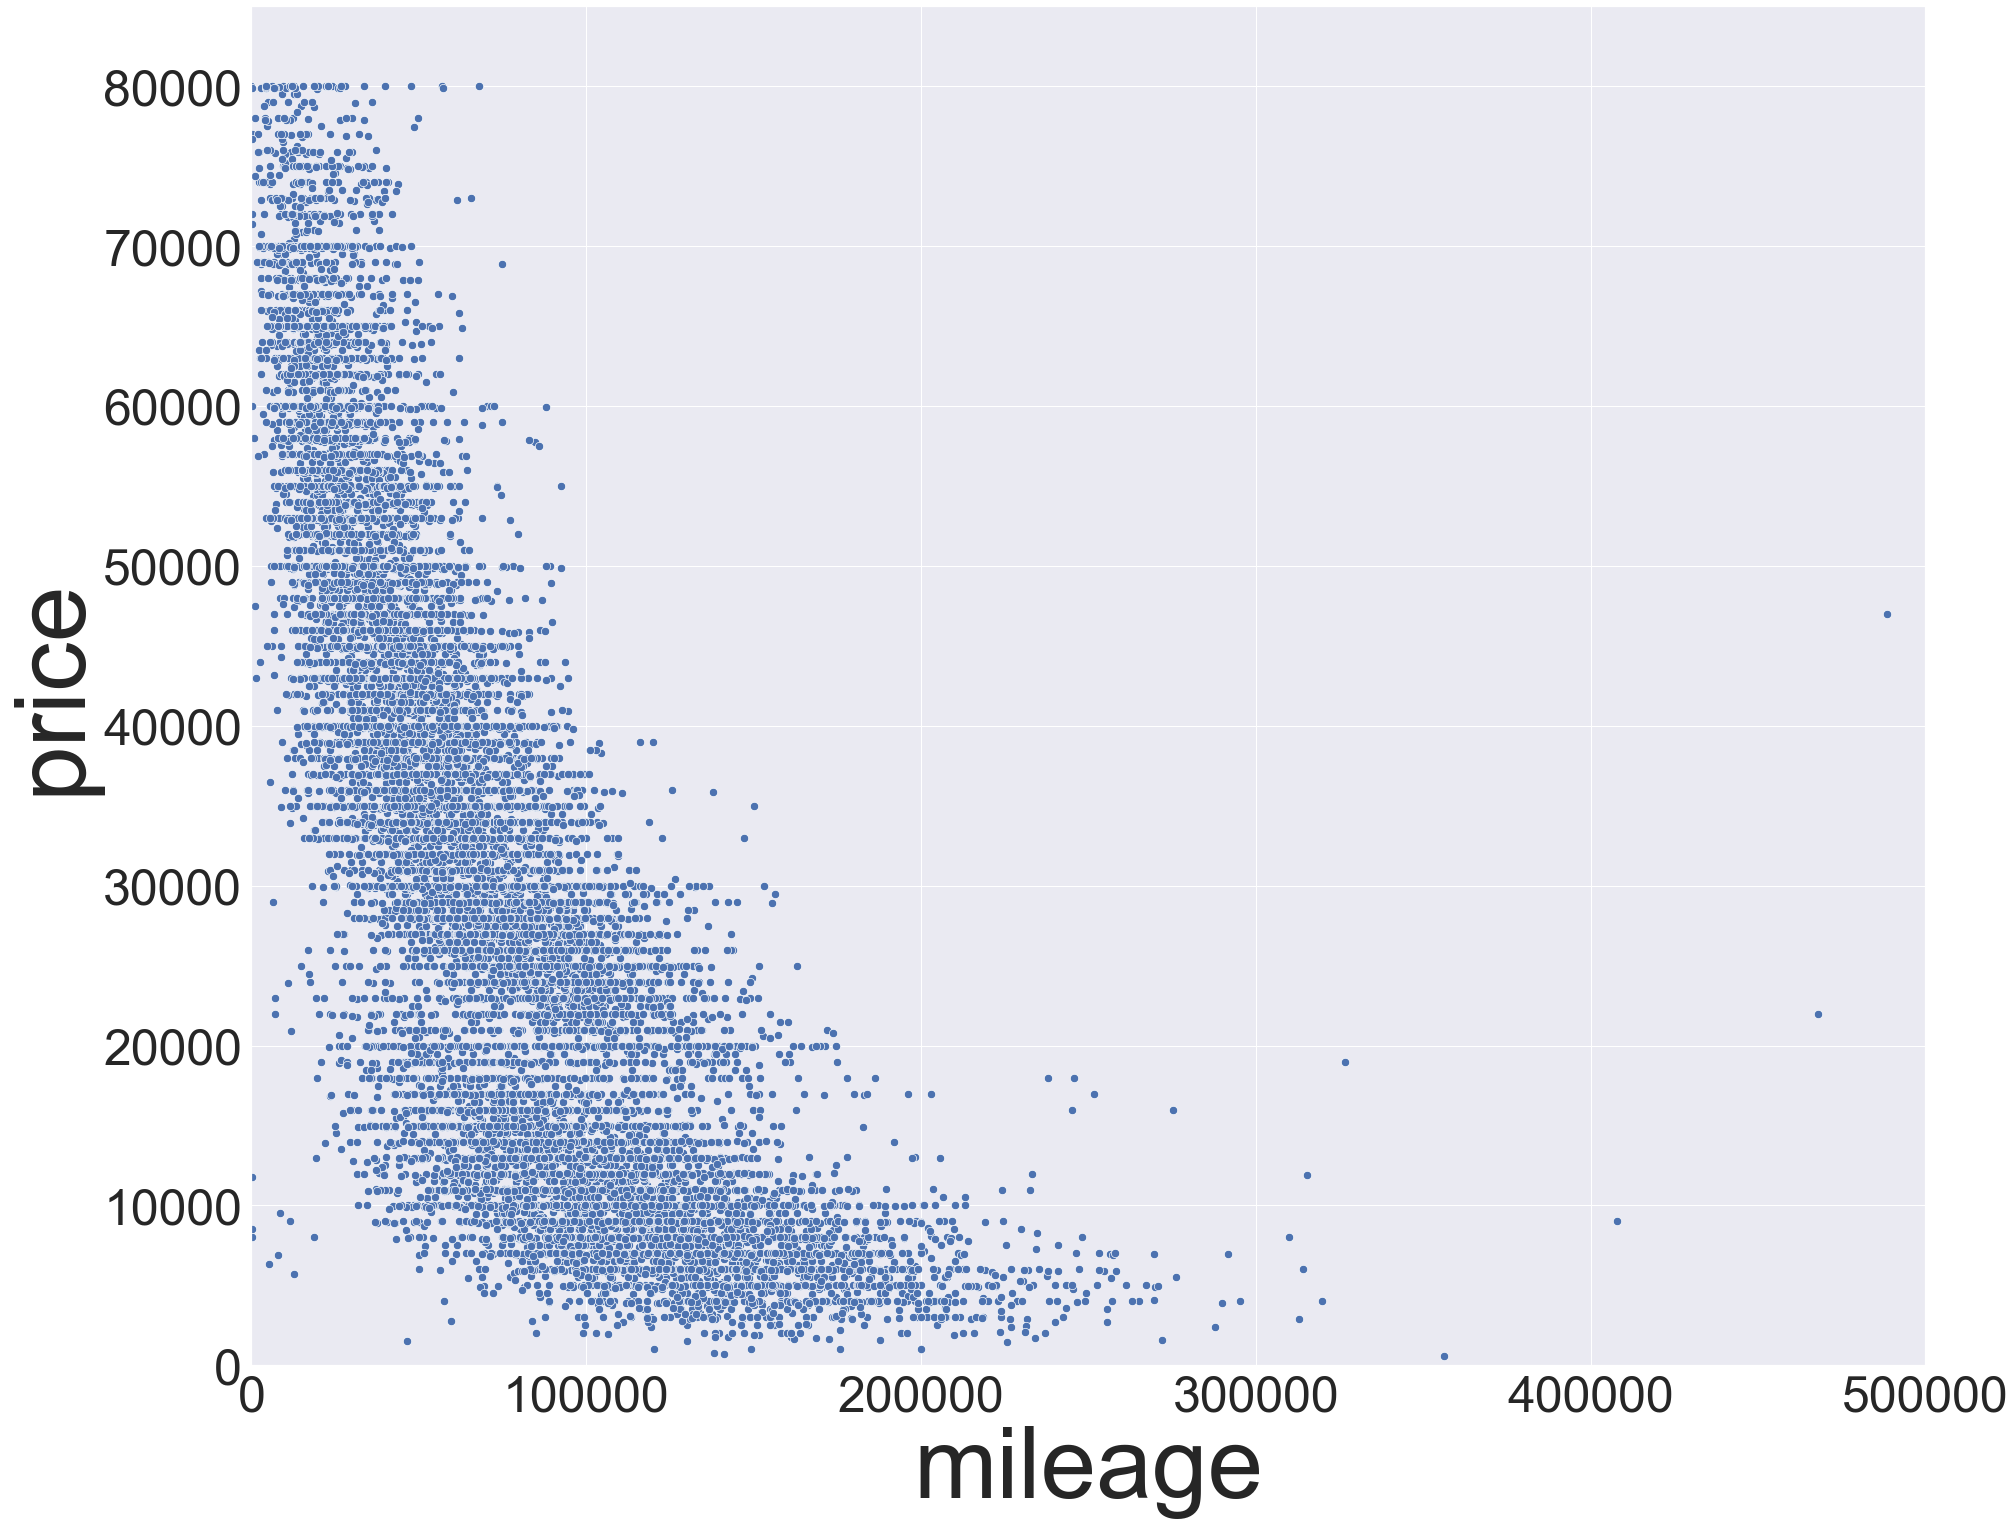

In [51]:
sns.scatterplot(x = cd.mileage, y = cd.price, s= 70)
sns.set(rc={'figure.figsize':(30,25)})
plt.xlabel("mileage", fontsize = 100)
plt.ylabel("price", fontsize = 100)
plt.xticks(fontsize= 50)
plt.yticks(fontsize= 50)
plt.xlim([0,500000])
plt.ylim([0,85000])
plt.savefig("price-mileage.png")
plt.show()

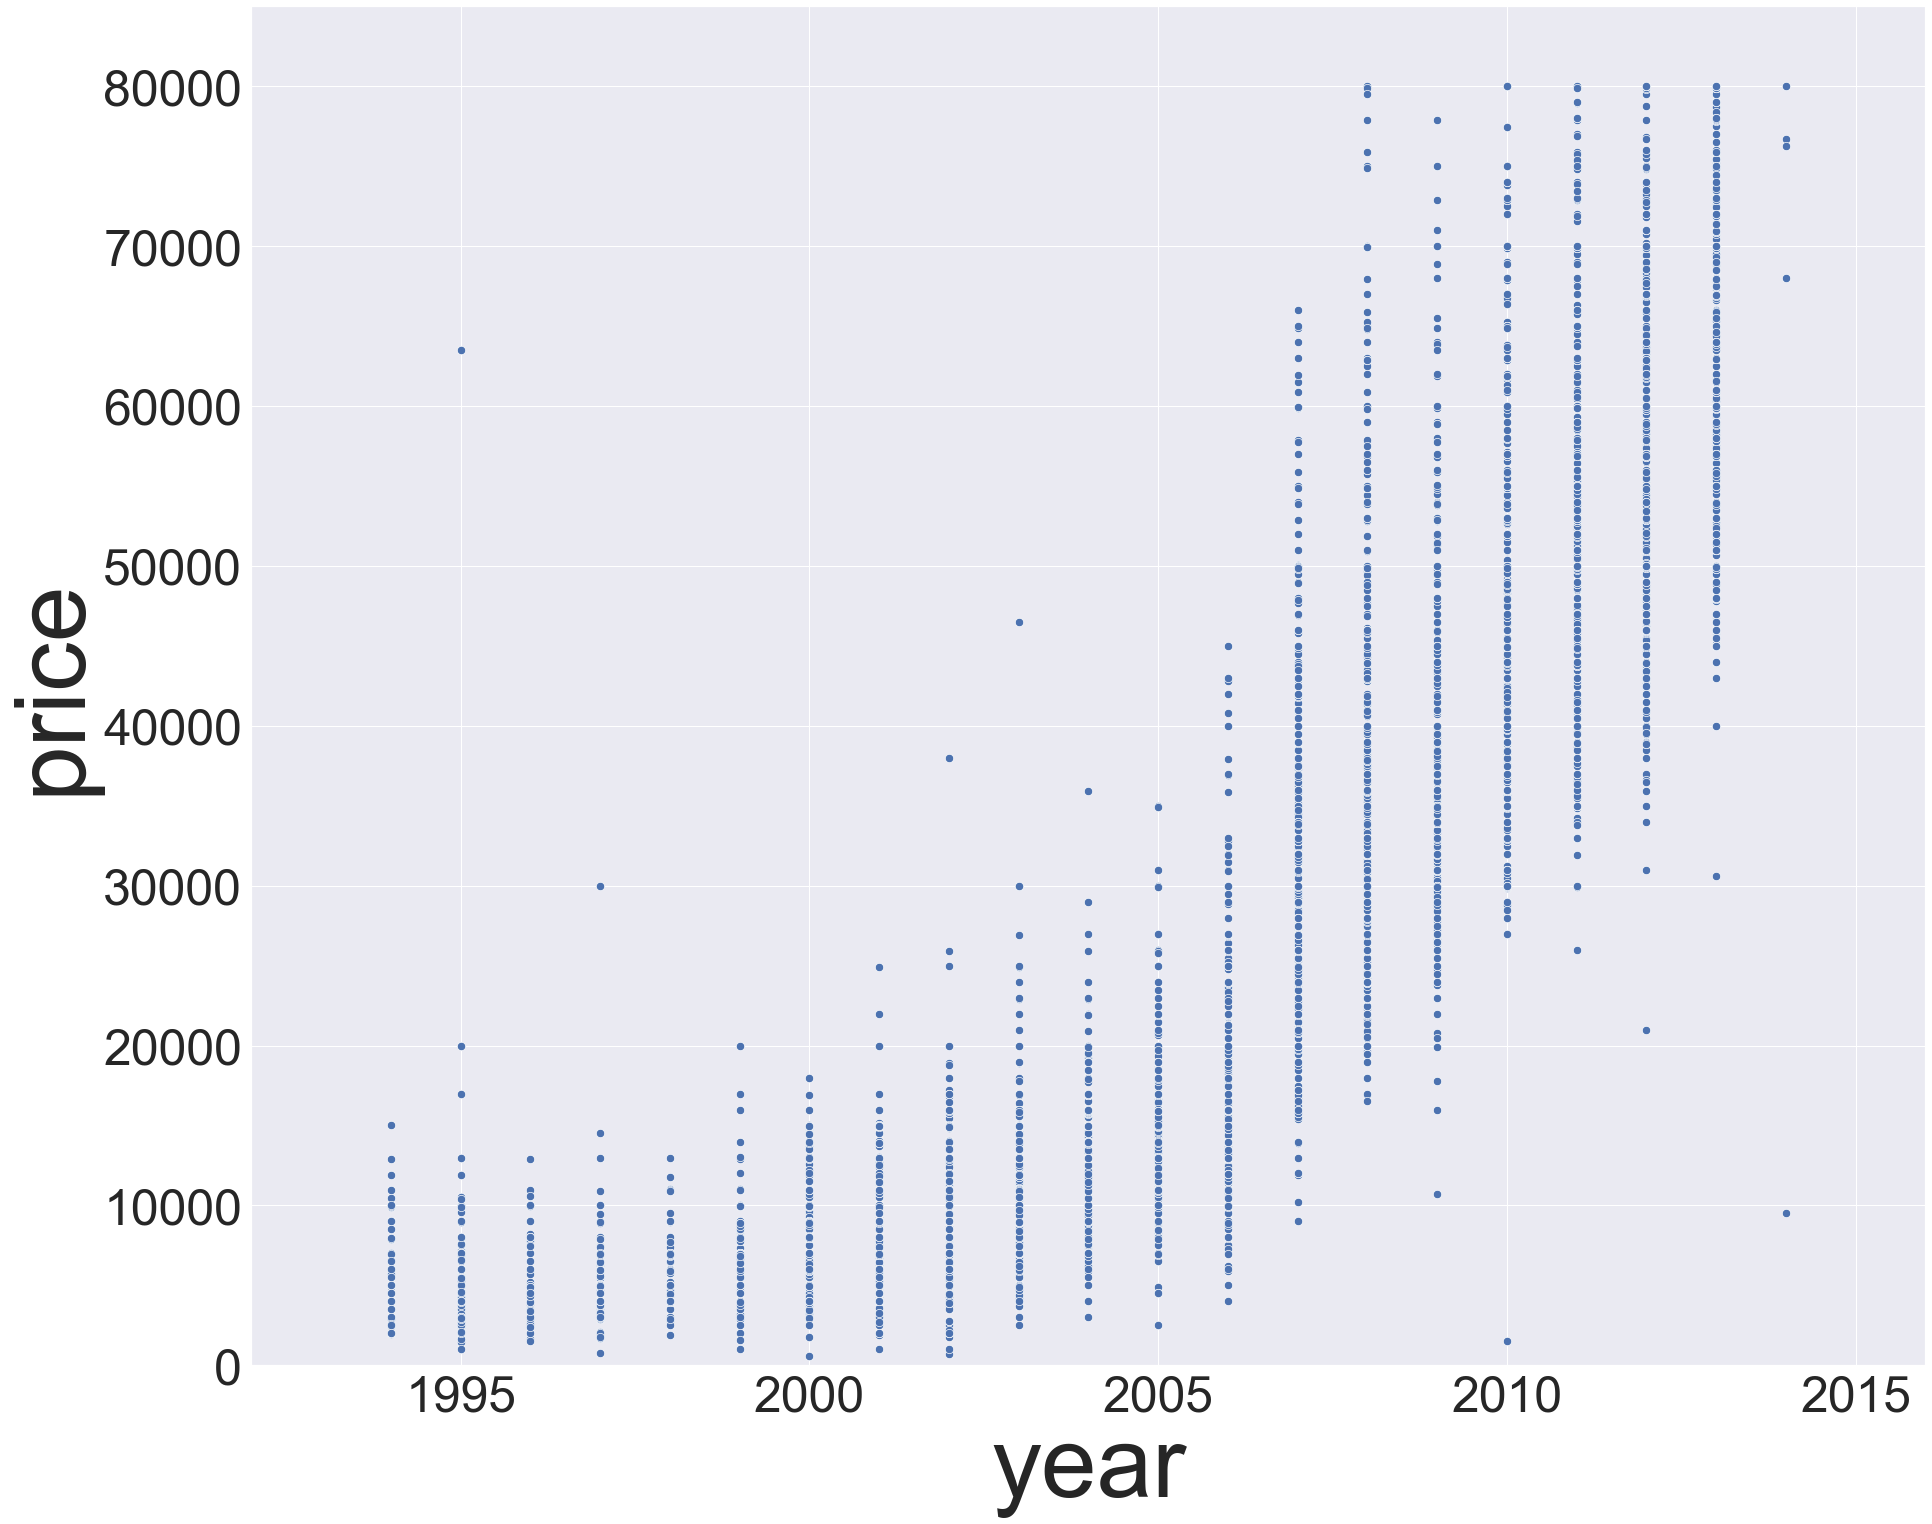

In [50]:
sns.scatterplot(x = cd.year, y = cd.price, s = 70)
sns.set(rc={'figure.figsize':(30,25)})
plt.xlabel("year", fontsize = 100)
plt.ylabel("price", fontsize = 100)
plt.xticks(fontsize= 50)
plt.yticks(fontsize= 50)
plt.xlim([1992,2016])
plt.ylim([0,85000])
plt.savefig("price-year.png")
plt.show()

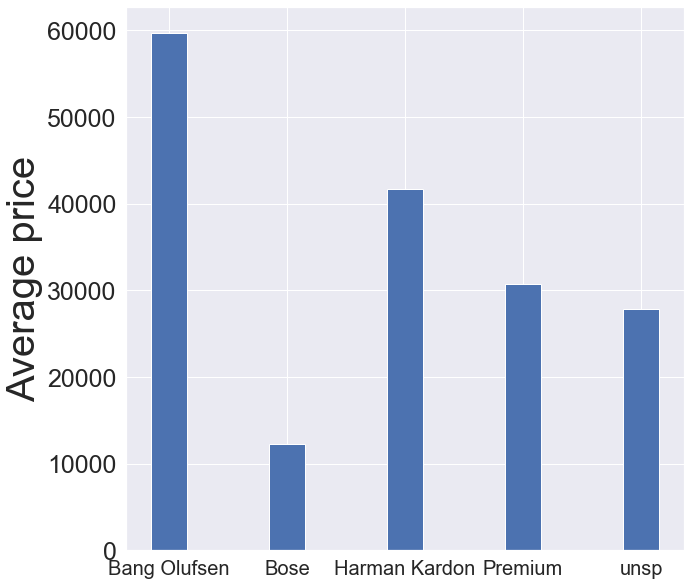

In [121]:
price_sound = cd.groupby(cd.soundSystem).price.mean()

plt.figure(figsize=(10, 10))
plt.bar(x=price_sound.keys(), height=price_sound, width=0.3)
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 25)
plt.ylabel("Average price", fontsize = 40)
plt.savefig("price-sound.png",bbox_inches='tight')
plt.show()

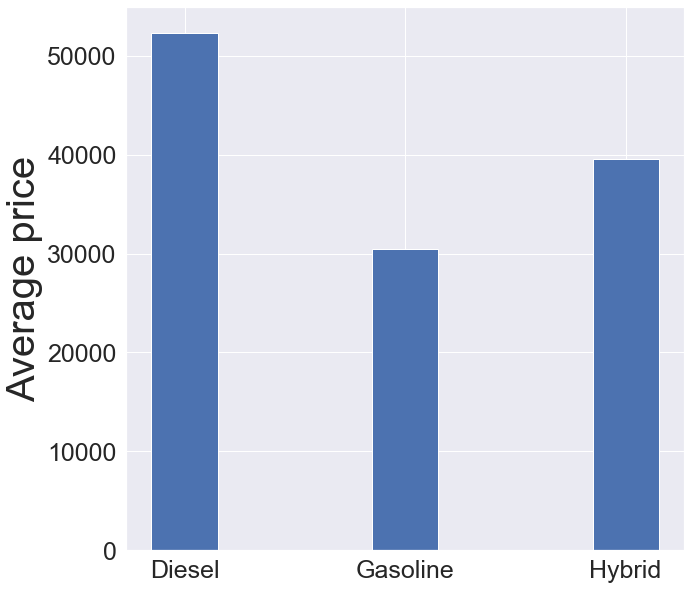

In [114]:
price_fuel = cd.groupby(cd.fuel).price.mean()

plt.figure(figsize=(10, 10))
plt.bar(x=price_fuel.keys(), height=price_fuel, width=0.3)
plt.xticks(fontsize= 25)
plt.yticks(fontsize= 25)
plt.ylabel("Average price", fontsize = 40)
plt.savefig("price-fuel.png",bbox_inches='tight')
plt.show()

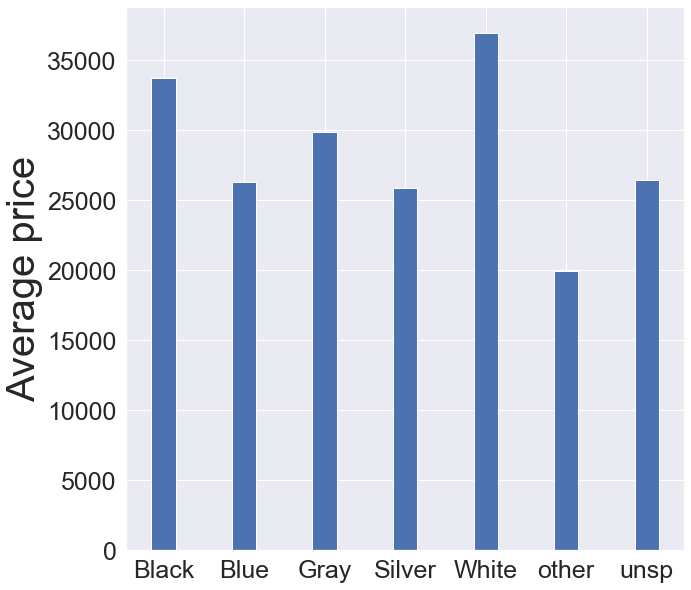

In [116]:
price_color = cd.groupby(cd.color).price.mean()

plt.figure(figsize=(10, 10))
plt.bar(x=price_color.keys(), height=price_color, width=0.3)
plt.xticks(fontsize= 25)
plt.yticks(fontsize= 25)
plt.ylabel("Average price", fontsize = 40)
plt.savefig("price-color.png",bbox_inches='tight')
plt.show()

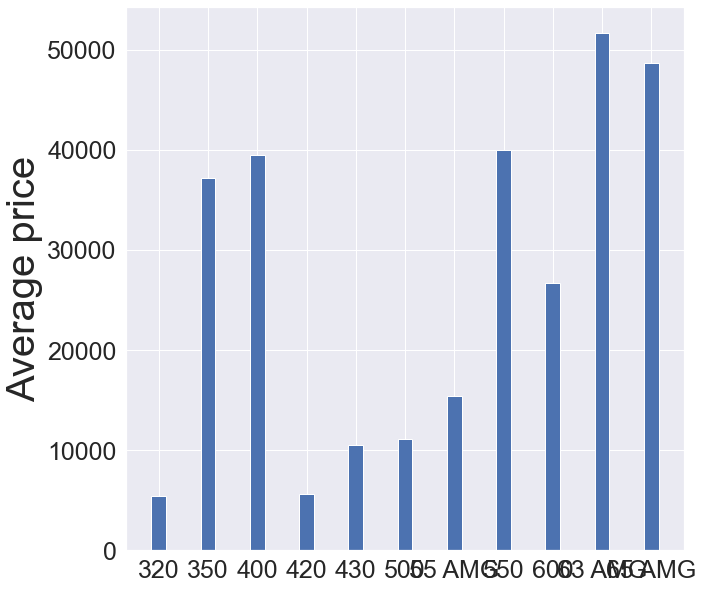

In [117]:
price_trim = cd.groupby(cd.trim).price.mean()

plt.figure(figsize=(10, 10))
plt.bar(x=price_trim.keys(), height=price_trim, width=0.3)
plt.xticks(fontsize= 25)
plt.yticks(fontsize= 25)
plt.ylabel("Average price", fontsize = 40)
plt.savefig("price-trim.png",bbox_inches='tight')
plt.show()

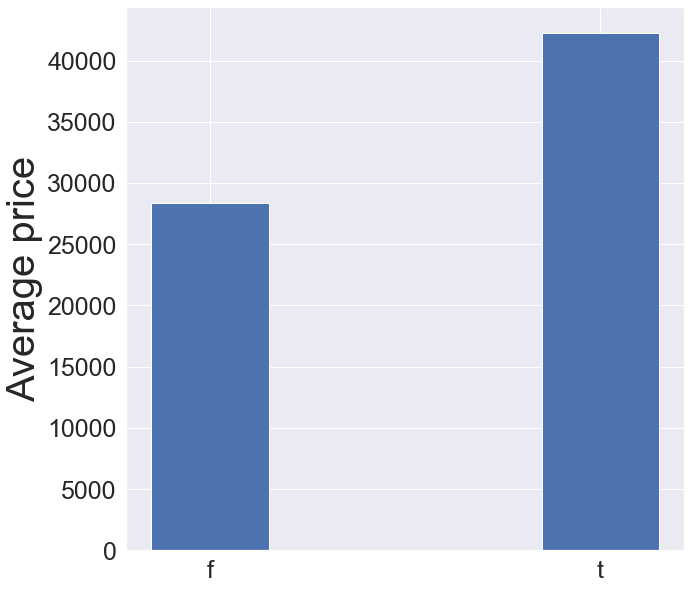

In [118]:
price_owner = cd.groupby(cd.isOneOwner).price.mean()

plt.figure(figsize=(10, 10))
plt.bar(x=price_owner.keys(), height=price_owner, width=0.3)
plt.xticks(fontsize= 25)
plt.yticks(fontsize= 25)
plt.ylabel("Average price", fontsize = 40)
plt.savefig("price-owner.png",bbox_inches='tight')
plt.show()

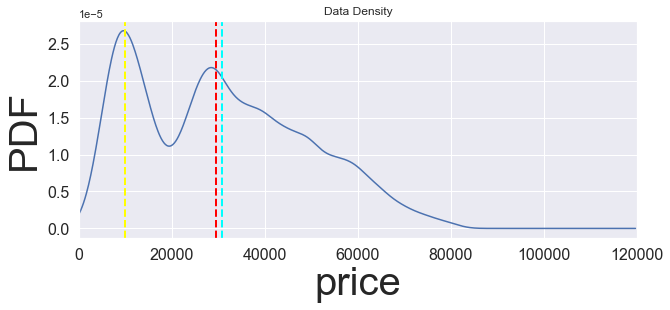

In [122]:
def show_density(var_data):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    #plt.show()

# Get the density of Grade
col = cd['price']
show_density(col)
plt.xlim([0,120000])
plt.ylabel("PDF", fontsize = 40)
plt.xlabel("price", fontsize = 40)
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.savefig("PDF_price.png",bbox_inches='tight')
plt.show()

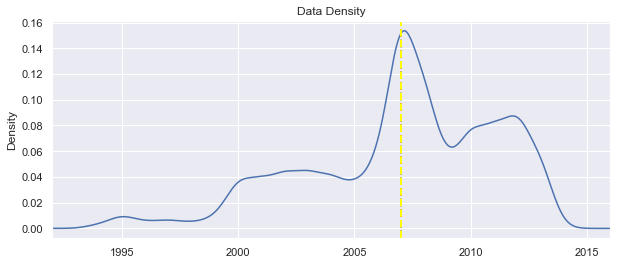

In [100]:
col = cd['year']
show_density(col)
plt.xlim([1992,2016])
plt.savefig("PDF_price.png")
plt.show()

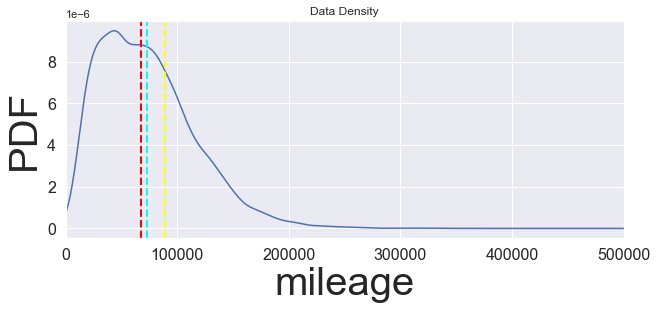

In [123]:
col = cd['mileage']
show_density(col)
plt.xlim([0,500000])
plt.ylabel("PDF", fontsize = 40)
plt.xlabel("mileage", fontsize = 40)
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.savefig("PDF_mileage.png",bbox_inches='tight')
plt.show()

# Model development

In [124]:
cd_one_hot = pd.get_dummies(cd[['trim','isOneOwner','color','displacement',
                                'fuel','region','soundSystem','wheelType']]
                                ,drop_first=True)
#X = pd.concat([cd_one_hot,cd[['mileage','year']]], axis=1)
cd_one_hot = cd_one_hot.astype('float64')
print('The size of the dummy variables for the categorical features is',cd_one_hot.shape)
cd_one_hot.head()

The size of the dummy variables for the categorical features is (20063, 35)


,displacement,trim_350,trim_400,trim_420,trim_430,trim_500,trim_55 AMG,trim_550,trim_600,trim_63 AMG,...,region_SoA,region_WNC,region_WSC,soundSystem_Bose,soundSystem_Harman Kardon,soundSystem_Premium,soundSystem_unsp,wheelType_Premium,wheelType_other,wheelType_unsp
0,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [125]:
X = np.hstack([cd_one_hot.to_numpy(),cd[['mileage','year']]])
print('The size of the feature dataset (X) is',X.shape)

The size of the feature dataset (X) is (20063, 37)


In [128]:
Y = cd['price'].to_numpy()
Y = Y.astype('float64') / 1000.0
print('The size of the target dataset (Y) is',Y.shape)
Y[0:5]

The size of the target dataset (Y) is (20063,)


array([2.988, 6.595, 7.993, 5.995, 3.   ])

In [129]:
## scale
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
X = scl.fit_transform(X)
print("means should be 0, std should be 1")
print(X.mean(axis=0))
print(X.std(axis=0))

means should be 0, std should be 1
[-1.63265813e-16  1.77077889e-17  6.30397283e-17 -4.95818088e-18
  8.49973865e-18  4.24986933e-17 -2.05410351e-17  1.26787768e-16
 -2.19576582e-17  6.12689495e-17 -7.40185574e-17  9.20805021e-17
  4.92276530e-17  1.00049007e-17  1.38120753e-17 -9.49137483e-17
 -3.04573968e-17 -7.08311554e-19  5.17067435e-17  6.30397283e-17
 -1.77077889e-18 -3.61238893e-17 -2.76241506e-17 -1.45203869e-17
 -3.36447988e-18  6.02064821e-17 -3.15198642e-17  8.14558288e-17
 -6.65812861e-17  1.55828542e-17  3.54155777e-17  9.06638790e-17
 -2.08951909e-17  4.07279144e-17  1.13329849e-16  1.26079457e-16
  7.34235757e-15]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print('The size of the training dataset (X_train) is',X_train.shape)
print('The size of the test dataset (X_test) is',X_test.shape)

The size of the training dataset (X_train) is (16050, 37)
The size of the test dataset (X_test) is (4013, 37)


## Linear model with no regularization

In [132]:
from sklearn.linear_model import LinearRegression

## simple regression
lmod = LinearRegression()
lmod.fit(X_train,y_train)

yhat_linear = lmod.predict(X_test)

In [136]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('r2 score on the test for linear regression is ',r2_score(y_test,yhat_linear))
print('RMSE on the test set for linear regression is ',mean_squared_error(y_test,yhat_linear))

r2 score on the test for linear regression is  0.8948152583671353
RMSE on the test set for linear regression is  33.98771592413131


In [165]:
lmod.coef_

array([-7.29267093e+00, -1.32380655e+00, -5.87475715e+13,  1.19829081e+00,
        1.00857924e+00,  4.26371525e+00,  2.43488926e+00,  1.14774728e+01,
        4.19710584e+00,  7.68143797e+00,  4.35258008e+00,  2.68256316e-01,
       -2.12398847e-01, -4.65490682e-01, -1.73746827e-01,  5.62905224e-01,
       -1.63921861e-01, -5.90564974e-02, -1.80787218e+00,  5.87475715e+13,
        4.34849666e-01,  3.50919801e-01,  2.02082856e-01,  1.52501547e-01,
        6.33295515e-01,  3.02797835e-01,  2.20915598e-01,  3.17407607e-01,
       -2.35189515e+00, -3.48916057e+00, -3.96395406e+00, -4.30237814e+00,
       -1.62384253e-01, -2.86627557e-01,  1.63823228e-01, -4.87574851e+00,
        8.54877784e+00])

In [164]:
# 35 is index of mileage
#plt.scatter(X_test[:,35],y_test,marker='o',c='black',s=10)

#X_test_sorted = X_test[X_test[:, 35].argsort()]
#yhat_sorted = lmod.predict(X_test_sorted)
#plt.plot(X_test_sorted[:,35],yhat_sorted,c='red',linewidth=1)
#plt.xlabel('mileage'); plt.ylabel('price')

## Linear model with Lasso regularization

number of alphas used: 1000
count    1000.000000
mean        1.769444
std         3.363933
min         0.001624
25%         0.016240
50%         0.162403
75%         1.624026
max        16.240129
dtype: float64


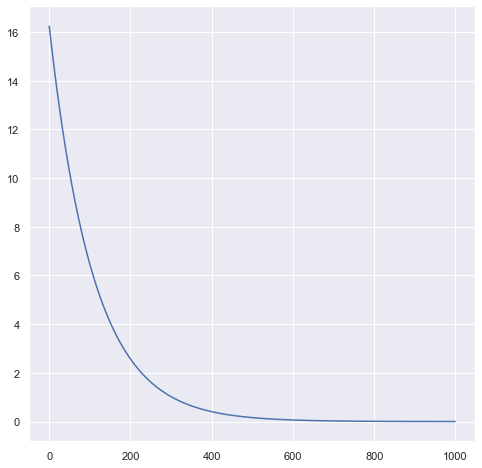

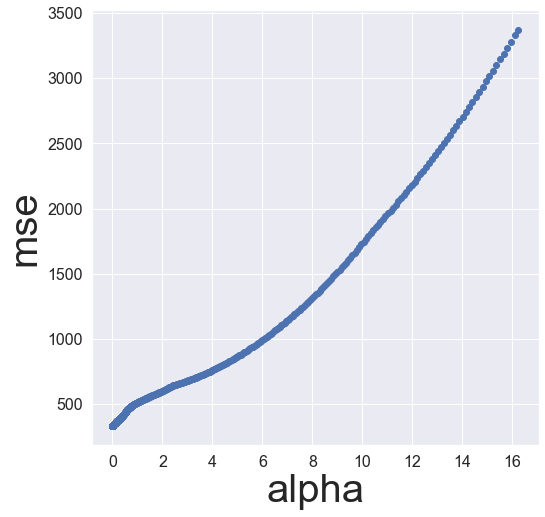

best alpha:  0.001624012930417891
coeficients at best alpha:  [-7.20988846e+00 -1.30251158e+00 -1.43378406e+00  1.29119803e+00
  7.87518933e-01  4.05529808e+00  2.35073778e+00  1.11287492e+01
  4.12650958e+00  7.59372190e+00  4.29679364e+00  3.19035680e-01
 -2.47044858e-01 -4.02896889e-01 -2.51645972e-01  5.97444960e-01
 -2.97862916e-02  8.07173671e-02 -1.72271951e+00 -0.00000000e+00
  2.60368281e-01 -9.95658797e-03  1.95018240e-02  7.00127298e-02
  4.06051243e-01  5.84971395e-02  1.38316174e-01  2.09507182e-01
 -1.62521593e+00 -2.37893332e+00 -2.59883018e+00 -2.67569618e+00
 -0.00000000e+00 -9.90371703e-02  3.55496229e-02 -4.92391835e+00
  8.68745280e+00]
number of 0 coefficents:  2
r2 score is for linear regression with Lasso regularization is  0.8953630364625236
RMSE on the test set for linear regression with Lasso regularization is  33.810715667188134


In [177]:
## lasso

from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

#alph = np.linspace(1,10000,10000)
#lcv = LassoCV(cv=10, alphas=alph, fit_intercept = True, eps= 0.00001)

lcv = LassoCV(cv=10, n_alphas=1000, fit_intercept = True, eps= 0.0001)
lcv.fit(X_train,y_train)

# look at alphas used
print("number of alphas used:",lcv.n_alphas)
print(pd.Series(lcv.alphas_).describe())

plt.figure(figsize=(8,8))
plt.plot(lcv.alphas_)
plt.show()

plt.figure(figsize=(8,8))
msep = lcv.mse_path_
mses = msep.sum(axis=1) # Averaging over all folds
plt.scatter(lcv.alphas_,mses)
plt.xlabel('alpha', fontsize = 40); plt.ylabel('mse', fontsize = 40)
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.savefig("Lasso.png",bbox_inches='tight')
plt.show()

#best alpha and coefficients
print("best alpha: ",lcv.alpha_)

#coefficents
print("coeficients at best alpha: ",lcv.coef_)
print("number of 0 coefficents: ",np.sum(lcv.coef_ == 0))

#fitted values
yhatL = lcv.predict(X_test)

print('r2 score is for linear regression with Lasso regularization is ',r2_score(y_test,yhatL))
print('RMSE on the test set for linear regression with Lasso regularization is ',mean_squared_error(y_test,yhatL))

number of alphas used: 1000
count    1000.000000
mean        1.769444
std         3.363933
min         0.001624
25%         0.016240
50%         0.162403
75%         1.624026
max        16.240129
dtype: float64


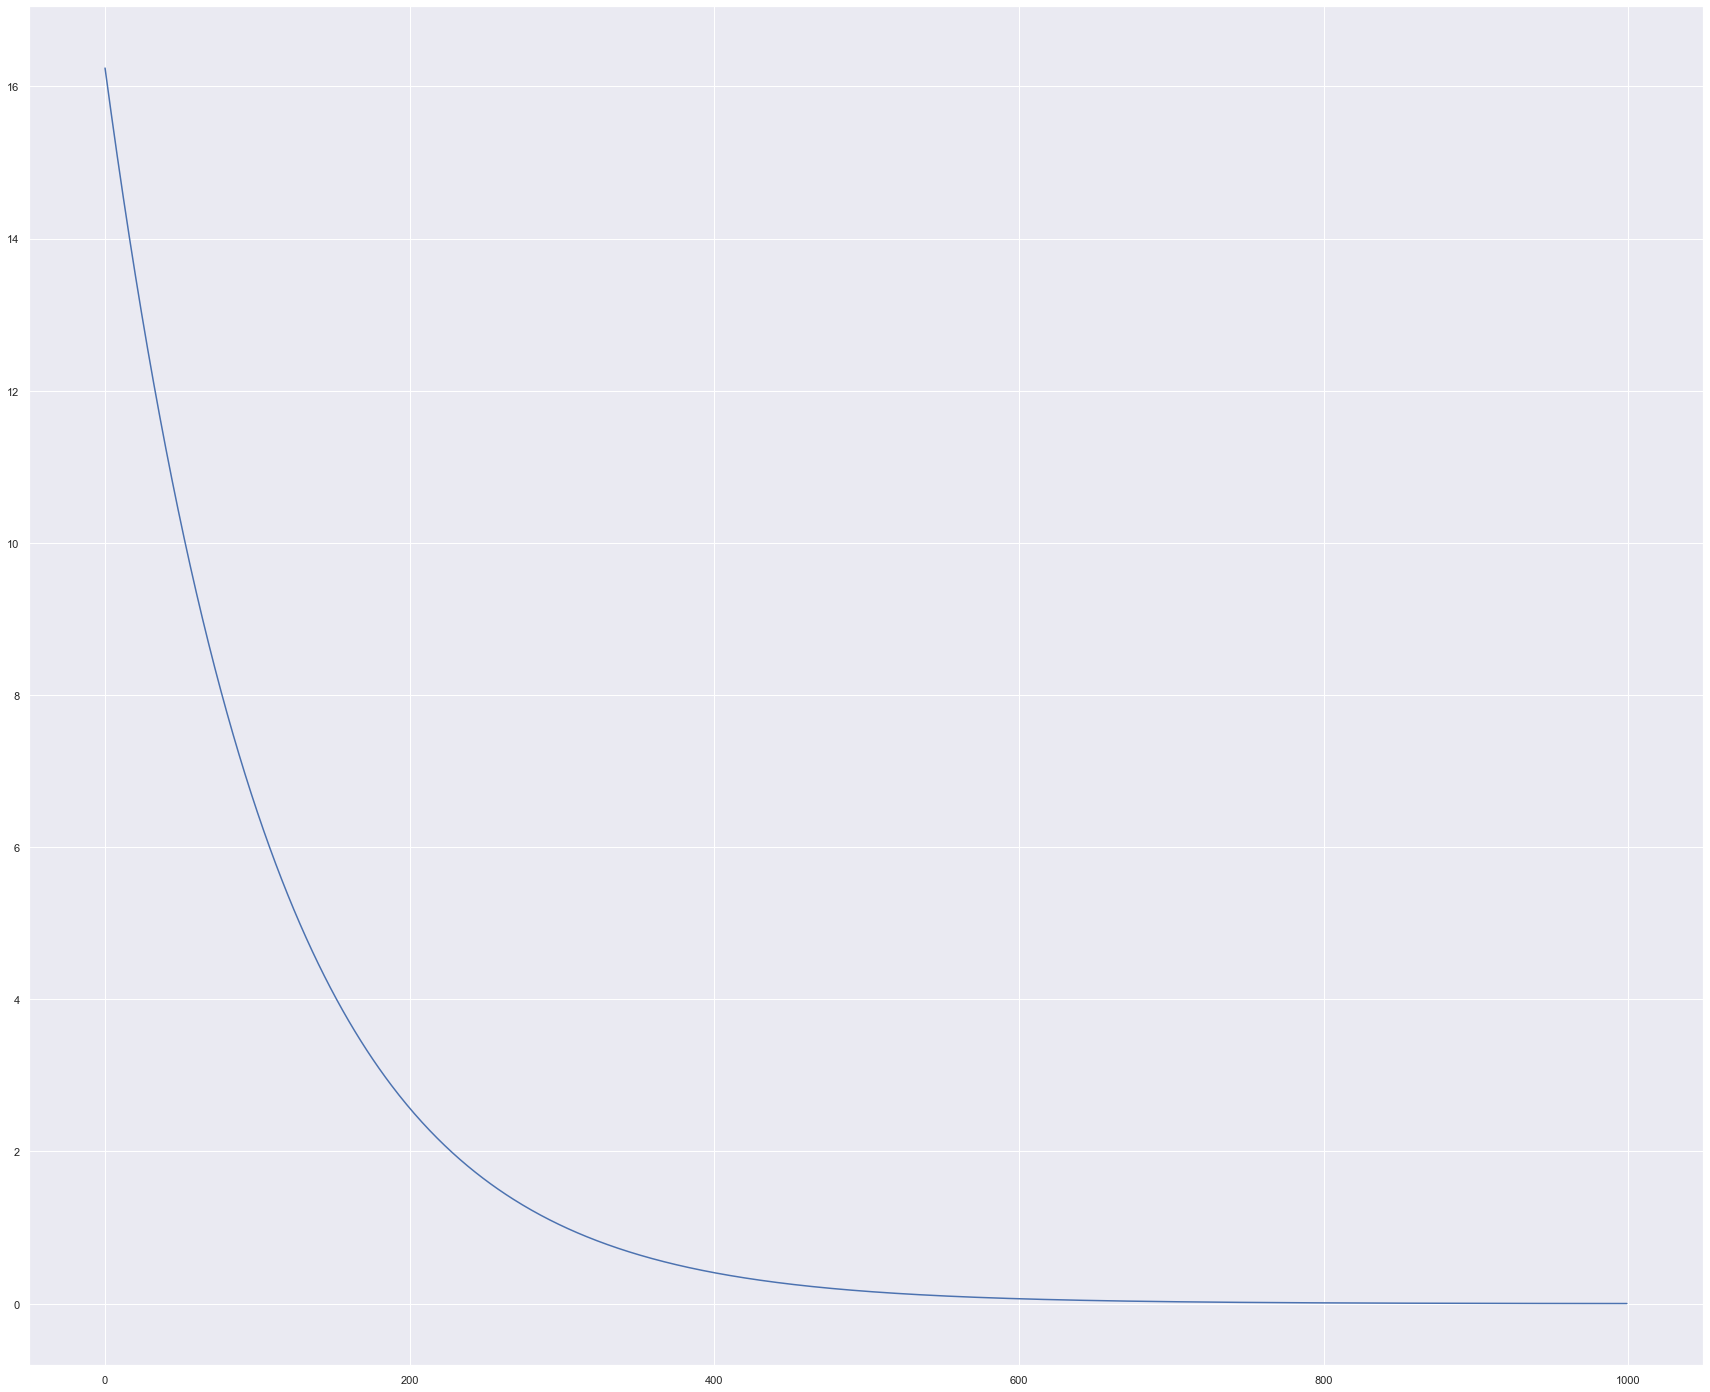

best alpha:  0.957988407022168
coeficients at best alpha:  [-7.27160490e+00 -1.27294496e+00 -7.05959101e-01  1.31923283e+00
  9.03126033e-01  4.18941704e+00  2.41120567e+00  1.13755450e+01
  4.20643331e+00  7.69131977e+00  4.34913644e+00  3.20036812e-01
 -2.49948879e-01 -4.03757865e-01 -2.53469518e-01  5.98750890e-01
 -3.17491304e-02  8.24606070e-02 -1.73889449e+00 -7.05959101e-01
  2.67576257e-01 -1.67807143e-03  2.73419979e-02  7.69689311e-02
  4.17571340e-01  7.20057572e-02  1.44702702e-01  2.18454118e-01
 -1.73382483e+00 -2.56006977e+00 -2.79414397e+00 -2.89621475e+00
 -1.43408042e-03 -1.01024789e-01  3.73453658e-02 -4.92147500e+00
  8.63912636e+00]
number of 0 coefficents:  0
r2 score is for linear regression with Ridge regularization is  0.8953687693992519
RMSE on the test set for linear regression with Ridge regularization is  33.80886321766066


In [169]:
## Ridge

from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

alph = np.linspace(1,10000,10000)
#Rcv = RidgeCV(cv=10, alphas=alph, fit_intercept = True)

Rcv = RidgeCV(cv=10, alphas=lcv.alphas_, fit_intercept = True)
Rcv.fit(X_train,y_train)

# look at alphas used
print("number of alphas used:",len(Rcv.alphas))
print(pd.Series(Rcv.alphas).describe())

plt.plot(Rcv.alphas)
plt.show()

#best alpha and coefficients
print("best alpha: ",Rcv.alpha_)

#coefficents
print("coeficients at best alpha: ",Rcv.coef_)
print("number of 0 coefficents: ",np.sum(Rcv.coef_ == 0))

#fitted values
yhatR = Rcv.predict(X_test)

print('r2 score is for linear regression with Ridge regularization is ',r2_score(y_test,yhatR))
print('RMSE on the test set for linear regression with Ridge regularization is ',mean_squared_error(y_test,yhatR))

## KNN

In [181]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

model = KNeighborsRegressor(n_jobs = 28) # create the knn model

### cross val on a grid using sklearn GridSearchCV

# hyperparamter values to try in the gid search
kvec = np.arange(20) + 2 #values of k to try
#param_grid={'n_neighbors' : kvec,'weights' : ('uniform', 'distance'), 'p' : [1,2], 'leaf_size': [30,40]} # Takes to much time
param_grid={'n_neighbors' : kvec, 'weights' : ('uniform', 'distance')}

# grid  is the grid searh object
grid = GridSearchCV(model,param_grid,cv=10,scoring='neg_mean_squared_error',n_jobs = 28)

# now run the grid search
grid.fit(X_train,y_train)

grid.best_params_ #best value from grid
grid.best_index_ # index of best value from grid
#check
print(grid.best_params_['n_neighbors'])


temp = grid.cv_results_ # results from the grid search (a dictionary)
print(temp.keys()) # what is in temp
temp['mean_test_score'] # this is the average score over folds at the values in param_grid

#transform to rmse
rmsevals = np.sqrt(-temp['mean_test_score'])

8
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'param_weights', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


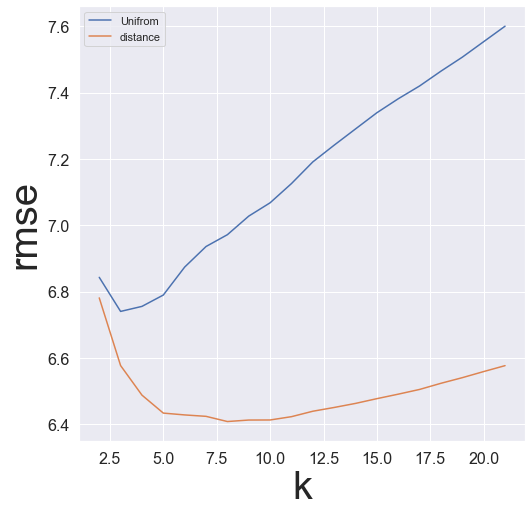

In [185]:
# plot
plt.figure(figsize=(8,8))
plt.plot(kvec,rmsevals[0::2]) # plot model complexity vs. rmse for wigths
#plt.xlabel('k',size='x-large')
#plt.ylabel('rmse',size='x-large')
#plt.title('rmse from GridSearch')
#plt.show

# plot
plt.plot(kvec,rmsevals[1::2]) # plot model complexity vs. rmse
#plt.xlabel('k',size='x-large')
#plt.ylabel('rmse',size='x-large')
#plt.title('rmse from GridSearch')

plt.xlabel('k', fontsize = 40); plt.ylabel('rmse', fontsize = 40)
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.legend(['Unifrom', 'distance'])
plt.savefig("KNN.png",bbox_inches='tight')

plt.show()

In [180]:
KNNm = KNeighborsRegressor(n_jobs = 28, n_neighbors = grid.best_params_['n_neighbors'], weights = grid.best_params_['weights'])
KNNm.fit(X_train,y_train)

yhat_KNN = KNNm.predict(X_test)

print('r2 score of the KNN method with n_neighbors = ',grid.best_params_['n_neighbors'], 'and weights = ', grid.best_params_['weights'], 'is', r2_score(y_test,yhat_KNN))
print('RMSE of the KNN method with n_neighbors = ',grid.best_params_['n_neighbors'], 'and weights = ', grid.best_params_['weights'], 'is', mean_squared_error(y_test,yhat_KNN))


r2 score of the KNN method with n_neighbors =  8 and weights =  distance is 0.8789856156794413
RMSE of the KNN method with n_neighbors =  8 and weights =  distance is 39.102653608987914


## Support vector machine

In [203]:
from sklearn.svm import SVR

# SVR 
SVRmod = SVR() # Let's do GridSearchCV for this model

# hyperparamter values to try in the gid search
#param_grid={'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
#                        'C' : [0.001,0.01,0.1,0.5,1,2,3,4]}
param_grid={'kernel' : ['rbf'],
                        'C' : [0.1,0.5,1,2,4,5,10,20,40]}
# grid  is the grid searh object
grid = GridSearchCV(SVRmod,param_grid,cv=10,scoring='neg_mean_squared_error',n_jobs = 28)

# now run the grid search
grid.fit(X_train,y_train)

grid.best_params_ #best value from grid
grid.best_index_ # index of best value from grid
#check
print(grid.best_params_)

temp = grid.cv_results_ # results from the grid search (a dictionary)
print(temp.keys()) # what is in temp
temp['mean_test_score'] # this is the average score over folds at the values in param_grid

#transform to rmse
rmsevals = np.sqrt(-temp['mean_test_score'])

{'C': 40, 'kernel': 'rbf'}
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_kernel', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


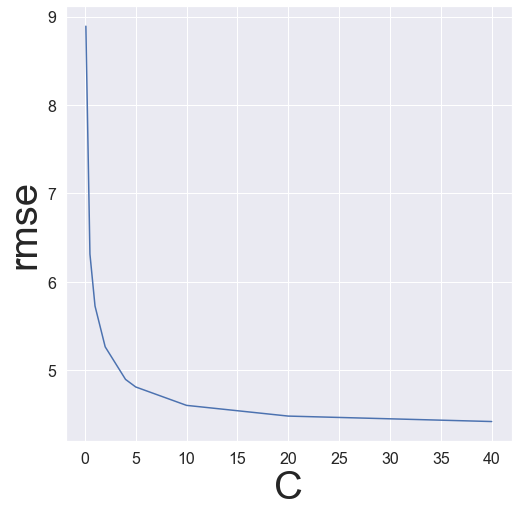

array([8.89050589, 6.31430865, 5.72638831, 5.26538936, 4.89721619,
       4.81176977, 4.60369919, 4.48257211, 4.42098671])

In [204]:
# plot
plt.figure(figsize=(8,8))
C_SVM = [0.1,0.5,1,2,4,5,10,20,40]
plt.plot(C_SVM,rmsevals) 

plt.xlabel('C', fontsize = 40); plt.ylabel('rmse', fontsize = 40)
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.savefig("SVM.png",bbox_inches='tight')

plt.show()
rmsevals

In [205]:
SVRmod = SVR(kernel = grid.best_params_['kernel'], 
                             C = grid.best_params_['C'])

SVRmod.fit(X_train,y_train)

#fitted values
yhat_SVR = SVRmod.predict(X_test)

print('r2 score is for SVM model is ',r2_score(y_test,yhat_SVR))
print('RMSE for SVM model is ',mean_squared_error(y_test,yhat_SVR))

r2 score is for SVM model is  0.9377794602593074
RMSE for SVM model is  20.104950551991866


## Decision Tree

In [221]:
from sklearn.tree import DecisionTreeRegressor 

# tree with at most 10 bottom nodes
tmod = DecisionTreeRegressor() # Let's do GridSearchCV for this model

# hyperparamter values to try in the gid search
#param_grid={'criterion' : ('squared_error', 'friedman_mse', 'absolute_error', 'poisson'), 'max_leaf_nodes': [150,160,170,180,190,200,210], 'max_features' : ('auto', 'log2', 'sqrt')}
param_grid={'criterion' : ['friedman_mse'], 'max_leaf_nodes': [150,160,170,180,190,200,210], 'max_features' : ['auto']}

# grid  is the grid searh object
grid = GridSearchCV(tmod,param_grid,cv=10,scoring='neg_mean_squared_error',n_jobs = 28)

# now run the grid search
grid.fit(X_train,y_train)

grid.best_params_ #best value from grid
grid.best_index_ # index of best value from grid
#check
print(grid.best_params_)

temp = grid.cv_results_ # results from the grid search (a dictionary)
print(temp.keys()) # what is in temp
temp['mean_test_score'] # this is the average score over folds at the values in param_grid

#transform to rmse
rmsevals = np.sqrt(-temp['mean_test_score'])


{'criterion': 'friedman_mse', 'max_features': 'auto', 'max_leaf_nodes': 180}
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_features', 'param_max_leaf_nodes', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


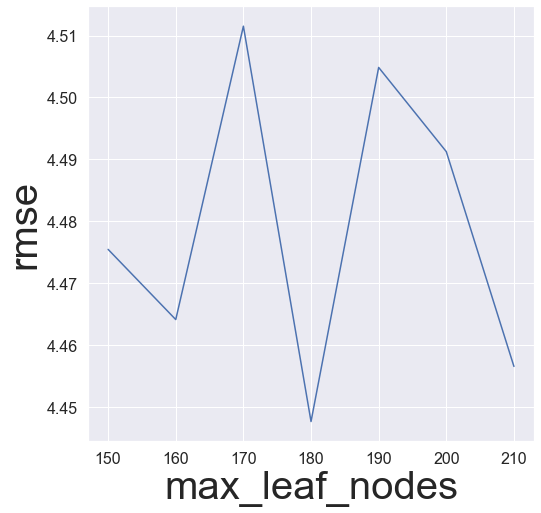

array([4.47544077, 4.46409461, 4.51151685, 4.44761358, 4.50484912,
       4.49123895, 4.45652056])

In [222]:
# plot
plt.figure(figsize=(8,8))
max_leaf_nodes = [150,160,170,180,190,200,210]
plt.plot(max_leaf_nodes,rmsevals) 

plt.xlabel('max_leaf_nodes', fontsize = 40); plt.ylabel('rmse', fontsize = 40)
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.savefig("DT.png",bbox_inches='tight')

plt.show()
rmsevals

In [224]:
tmod = DecisionTreeRegressor(criterion = grid.best_params_['criterion'], 
                             max_leaf_nodes = grid.best_params_['max_leaf_nodes'],
                             max_features = grid.best_params_['max_features'])
tmod.fit(X_train,y_train)

#fitted values
yhat_DT = tmod.predict(X_test)

print('r2 score is for decision tree model is ',r2_score(y_test,yhat_DT))
print('RMSE for decision tree model is ',mean_squared_error(y_test,yhat_DT))

r2 score is for decision tree model is  0.9348031484578413
RMSE for decision tree model is  21.066668368088674


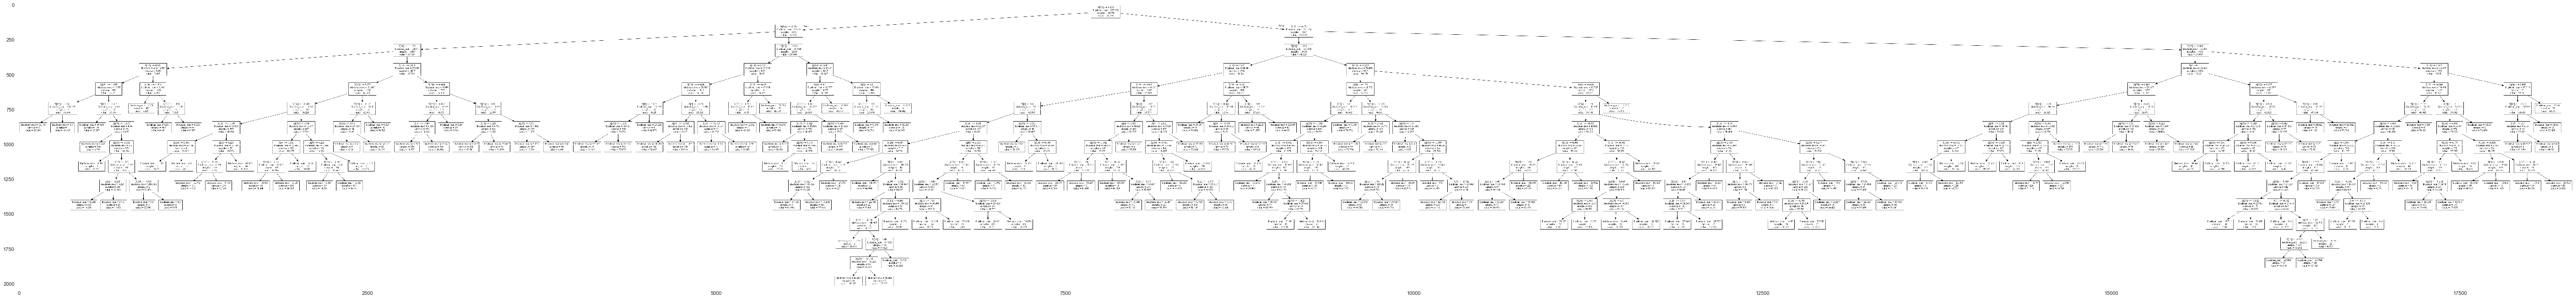

In [238]:
### plot a tree
import matplotlib.image as mpimg
import pydotplus
from sklearn import tree
import os

dot_data = tree.export_graphviz(tmod,out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("tree.png") #write graph to file
## the picture is now in the file tree.png
os.system('eog tree.png') #display file from python command line, unix command eog
img = mpimg.imread("tree.png")
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [215]:
### variable importance
 
varimp = tmod.feature_importances_
print('variable importances:',varimp)
print(pd.Series(tmod.feature_importances_))

variable importances: [1.10781611e-02 0.00000000e+00 4.48708142e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.00296898e-04 5.86824606e-04
 2.75163204e-03 8.01646776e-03 9.18319735e-03 1.01033399e-04
 0.00000000e+00 4.47670343e-05 4.42408470e-05 5.55402195e-04
 5.30945335e-05 9.97017221e-05 3.74020168e-04 0.00000000e+00
 0.00000000e+00 1.12757099e-04 0.00000000e+00 1.31759569e-04
 4.46882278e-04 5.12179524e-04 2.20653500e-04 4.80057283e-05
 0.00000000e+00 2.29668099e-04 1.68898927e-04 3.61407145e-04
 0.00000000e+00 0.00000000e+00 5.95239512e-04 1.46242547e-01
 8.17392454e-01]
0     0.011078
1     0.000000
2     0.000449
3     0.000000
4     0.000000
5     0.000000
6     0.000200
7     0.000587
8     0.002752
9     0.008016
10    0.009183
11    0.000101
12    0.000000
13    0.000045
14    0.000044
15    0.000555
16    0.000053
17    0.000100
18    0.000374
19    0.000000
20    0.000000
21    0.000113
22    0.000000
23    0.000132
24    0.000447
25    0.000512
26    0.000221
27    0

### The features with the highest feature importance factor are year, mileage and displacement with factors of 0.817, 0.146 and 0.011 respectively. The feature importance factor was significantly smaller for other features, suggesting that training a model with only these three features would suffice.

## Random forest

In [227]:
from sklearn.ensemble import RandomForestRegressor

rfmod = RandomForestRegressor(random_state=0,n_jobs=-1)

# hyperparamter values to try in the gid search
param_grid={'n_estimators': [500,600,700,800,900,1000]}
#'criterion' : ('squared_error', 'absolute_error', 'poisson')
# grid  is the grid searh object
grid = GridSearchCV(rfmod,param_grid,cv=10,scoring='neg_mean_squared_error',n_jobs = 28)

# now run the grid search
grid.fit(X_train,y_train)

grid.best_params_ #best value from grid
grid.best_index_ # index of best value from grid
#check
print(grid.best_params_)

{'n_estimators': 600}


In [232]:
rfmod = RandomForestRegressor(random_state=0,n_jobs=-1, n_estimators = grid.best_params_['n_estimators'])

rfmod.fit(X_train,y_train)

#fitted values
yhat_RF = rfmod.predict(X_test)

print('r2 score is for random forest model is ',r2_score(y_test,yhat_RF))
print('RMSE  for random forest model is ',mean_squared_error(y_test,yhat_RF))

r2 score is for random forest model is  0.9387430352804575
RMSE  for random forest model is  19.79359632340278


dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


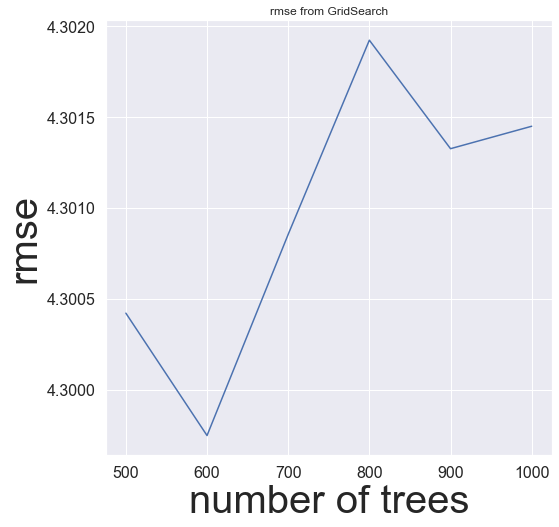

In [234]:
temp = grid.cv_results_ # results from the grid search (a dictionary)
print(temp.keys()) # what is in temp
temp['mean_test_score'] # this is the average score over folds at the values in param_grid

#transform to rmse
rmsevals = np.sqrt(-temp['mean_test_score'])
n_estimators = [500,600,700,800,900,1000]

# plot
plt.figure(figsize=(8,8))
plt.plot(n_estimators,rmsevals) # plot model complexity vs. rmse for wigths
plt.title('rmse from GridSearch')
plt.xlabel('number of trees', fontsize = 40); plt.ylabel('rmse', fontsize = 40)
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.savefig("RF.png",bbox_inches='tight')
plt.show()

## Neural Network

Epoch 1/2000
17/17 - 0s - loss: 1140.4572 - mse: 1113.5691 - val_loss: 825.8788 - val_mse: 798.4092
Epoch 2/2000
17/17 - 0s - loss: 509.3907 - mse: 480.6944 - val_loss: 171.2704 - val_mse: 140.7628
Epoch 3/2000
17/17 - 0s - loss: 153.9124 - mse: 123.2074 - val_loss: 98.8515 - val_mse: 69.2754
Epoch 4/2000
17/17 - 0s - loss: 90.5026 - mse: 61.7973 - val_loss: 72.4947 - val_mse: 44.3508
Epoch 5/2000
17/17 - 0s - loss: 67.6772 - mse: 39.8945 - val_loss: 60.5824 - val_mse: 33.4316
Epoch 6/2000
17/17 - 0s - loss: 57.5534 - mse: 30.9216 - val_loss: 54.2898 - val_mse: 28.2091
Epoch 7/2000
17/17 - 0s - loss: 52.3683 - mse: 26.7249 - val_loss: 51.0318 - val_mse: 25.9372
Epoch 8/2000
17/17 - 0s - loss: 49.5143 - mse: 24.8162 - val_loss: 49.3712 - val_mse: 25.1781
Epoch 9/2000
17/17 - 0s - loss: 47.3680 - mse: 23.5644 - val_loss: 47.1026 - val_mse: 23.7795
Epoch 10/2000
17/17 - 0s - loss: 45.5997 - mse: 22.6322 - val_loss: 45.6774 - val_mse: 23.1671
Epoch 11/2000
17/17 - 0s - loss: 44.1592 - mse:

Epoch 88/2000
17/17 - 0s - loss: 21.3536 - mse: 15.8737 - val_loss: 23.9146 - val_mse: 18.4921
Epoch 89/2000
17/17 - 0s - loss: 21.4840 - mse: 16.0675 - val_loss: 24.3223 - val_mse: 18.8789
Epoch 90/2000
17/17 - 0s - loss: 21.5818 - mse: 16.1903 - val_loss: 23.7578 - val_mse: 18.4096
Epoch 91/2000
17/17 - 0s - loss: 21.7976 - mse: 16.4573 - val_loss: 24.0295 - val_mse: 18.7109
Epoch 92/2000
17/17 - 0s - loss: 21.2239 - mse: 15.9250 - val_loss: 23.5371 - val_mse: 18.2650
Epoch 93/2000
17/17 - 0s - loss: 21.2137 - mse: 15.9404 - val_loss: 24.0389 - val_mse: 18.7600
Epoch 94/2000
17/17 - 0s - loss: 21.1565 - mse: 15.9193 - val_loss: 23.4815 - val_mse: 18.2667
Epoch 95/2000
17/17 - 0s - loss: 20.9798 - mse: 15.7770 - val_loss: 23.5668 - val_mse: 18.3884
Epoch 96/2000
17/17 - 0s - loss: 21.0746 - mse: 15.9186 - val_loss: 24.0970 - val_mse: 18.9132
Epoch 97/2000
17/17 - 0s - loss: 21.1605 - mse: 16.0143 - val_loss: 23.5166 - val_mse: 18.3910
Epoch 98/2000
17/17 - 0s - loss: 21.2000 - mse: 16

Epoch 174/2000
17/17 - 0s - loss: 19.4117 - mse: 15.5666 - val_loss: 21.9949 - val_mse: 18.1482
Epoch 175/2000
17/17 - 0s - loss: 19.3284 - mse: 15.4849 - val_loss: 22.1218 - val_mse: 18.2911
Epoch 176/2000
17/17 - 0s - loss: 19.5821 - mse: 15.7456 - val_loss: 22.0773 - val_mse: 18.2637
Epoch 177/2000
17/17 - 0s - loss: 19.6365 - mse: 15.8123 - val_loss: 22.2330 - val_mse: 18.3975
Epoch 178/2000
17/17 - 0s - loss: 19.4752 - mse: 15.6576 - val_loss: 22.1283 - val_mse: 18.3076
Epoch 179/2000
17/17 - 0s - loss: 19.5609 - mse: 15.7485 - val_loss: 23.3042 - val_mse: 19.4426
Epoch 180/2000
17/17 - 0s - loss: 19.7064 - mse: 15.8904 - val_loss: 22.4254 - val_mse: 18.6399
Epoch 181/2000
17/17 - 0s - loss: 19.8264 - mse: 16.0054 - val_loss: 22.3347 - val_mse: 18.5131
Epoch 182/2000
17/17 - 0s - loss: 19.3714 - mse: 15.5633 - val_loss: 21.9166 - val_mse: 18.1091
Epoch 183/2000
17/17 - 0s - loss: 19.1951 - mse: 15.4034 - val_loss: 21.9209 - val_mse: 18.1447
Epoch 184/2000
17/17 - 0s - loss: 19.101

Epoch 260/2000
17/17 - 0s - loss: 18.6432 - mse: 15.2611 - val_loss: 22.6472 - val_mse: 19.2205
Epoch 261/2000
17/17 - 0s - loss: 19.2330 - mse: 15.8521 - val_loss: 22.0131 - val_mse: 18.6112
Epoch 262/2000
17/17 - 0s - loss: 18.8570 - mse: 15.4688 - val_loss: 21.7253 - val_mse: 18.3661
Epoch 263/2000
17/17 - 0s - loss: 18.8259 - mse: 15.4493 - val_loss: 21.3667 - val_mse: 18.0072
Epoch 264/2000
17/17 - 0s - loss: 18.6407 - mse: 15.2669 - val_loss: 22.1706 - val_mse: 18.7583
Epoch 265/2000
17/17 - 0s - loss: 18.9394 - mse: 15.5575 - val_loss: 22.2942 - val_mse: 18.8918
Epoch 266/2000
17/17 - 0s - loss: 19.0529 - mse: 15.6851 - val_loss: 22.0842 - val_mse: 18.6920
Epoch 267/2000
17/17 - 0s - loss: 19.0324 - mse: 15.6589 - val_loss: 21.3636 - val_mse: 18.0071
Epoch 268/2000
17/17 - 0s - loss: 19.0298 - mse: 15.6703 - val_loss: 21.7288 - val_mse: 18.3966
Epoch 269/2000
17/17 - 0s - loss: 18.5322 - mse: 15.1823 - val_loss: 21.5020 - val_mse: 18.1532
Epoch 270/2000
17/17 - 0s - loss: 18.746

Epoch 346/2000
17/17 - 0s - loss: 18.4179 - mse: 15.2983 - val_loss: 21.5592 - val_mse: 18.4331
Epoch 347/2000
17/17 - 0s - loss: 18.3910 - mse: 15.2728 - val_loss: 21.4630 - val_mse: 18.3261
Epoch 348/2000
17/17 - 0s - loss: 18.2416 - mse: 15.1224 - val_loss: 21.5480 - val_mse: 18.4055
Epoch 349/2000
17/17 - 0s - loss: 18.2966 - mse: 15.1780 - val_loss: 21.5451 - val_mse: 18.4577
Epoch 350/2000
17/17 - 0s - loss: 18.2037 - mse: 15.0989 - val_loss: 21.7442 - val_mse: 18.6092
Epoch 351/2000
17/17 - 0s - loss: 18.3459 - mse: 15.2357 - val_loss: 21.5985 - val_mse: 18.4840
Epoch 352/2000
17/17 - 0s - loss: 18.3291 - mse: 15.2228 - val_loss: 21.1679 - val_mse: 18.0564
Epoch 353/2000
17/17 - 0s - loss: 18.1933 - mse: 15.0915 - val_loss: 21.4517 - val_mse: 18.3451
Epoch 354/2000
17/17 - 0s - loss: 18.3951 - mse: 15.2983 - val_loss: 21.1472 - val_mse: 18.0396
Epoch 355/2000
17/17 - 0s - loss: 18.2964 - mse: 15.1899 - val_loss: 21.2527 - val_mse: 18.1765
Epoch 356/2000
17/17 - 0s - loss: 18.116

Epoch 432/2000
17/17 - 0s - loss: 17.9136 - mse: 14.9650 - val_loss: 20.9690 - val_mse: 18.0333
Epoch 433/2000
17/17 - 0s - loss: 18.0406 - mse: 15.0926 - val_loss: 21.5878 - val_mse: 18.6300
Epoch 434/2000
17/17 - 0s - loss: 18.4815 - mse: 15.5401 - val_loss: 20.8543 - val_mse: 17.9189
Epoch 435/2000
17/17 - 0s - loss: 17.9382 - mse: 15.0014 - val_loss: 20.8269 - val_mse: 17.8936
Epoch 436/2000
17/17 - 0s - loss: 17.7966 - mse: 14.8634 - val_loss: 21.3139 - val_mse: 18.3674
Epoch 437/2000
17/17 - 0s - loss: 18.3188 - mse: 15.3717 - val_loss: 21.1056 - val_mse: 18.1683
Epoch 438/2000
17/17 - 0s - loss: 17.9974 - mse: 15.0625 - val_loss: 21.0535 - val_mse: 18.1230
Epoch 439/2000
17/17 - 0s - loss: 18.0062 - mse: 15.0667 - val_loss: 21.0056 - val_mse: 18.0827
Epoch 440/2000
17/17 - 0s - loss: 17.8128 - mse: 14.8726 - val_loss: 20.8481 - val_mse: 17.9158
Epoch 441/2000
17/17 - 0s - loss: 18.1844 - mse: 15.2404 - val_loss: 21.5648 - val_mse: 18.6045
Epoch 442/2000
17/17 - 0s - loss: 17.949

Epoch 518/2000
17/17 - 0s - loss: 17.5867 - mse: 14.7694 - val_loss: 20.7791 - val_mse: 17.9733
Epoch 519/2000
17/17 - 0s - loss: 17.7056 - mse: 14.8844 - val_loss: 20.9181 - val_mse: 18.1112
Epoch 520/2000
17/17 - 0s - loss: 17.8160 - mse: 14.9921 - val_loss: 20.9609 - val_mse: 18.1139
Epoch 521/2000
17/17 - 0s - loss: 17.6535 - mse: 14.8185 - val_loss: 20.9193 - val_mse: 18.1035
Epoch 522/2000
17/17 - 0s - loss: 17.5821 - mse: 14.7560 - val_loss: 20.8848 - val_mse: 18.0529
Epoch 523/2000
17/17 - 0s - loss: 17.7856 - mse: 14.9596 - val_loss: 20.9282 - val_mse: 18.1214
Epoch 524/2000
17/17 - 0s - loss: 17.6572 - mse: 14.8329 - val_loss: 20.9822 - val_mse: 18.1593
Epoch 525/2000
17/17 - 0s - loss: 17.6903 - mse: 14.8720 - val_loss: 20.8982 - val_mse: 18.0691
Epoch 526/2000
17/17 - 0s - loss: 18.0548 - mse: 15.2231 - val_loss: 20.8715 - val_mse: 18.0687
Epoch 527/2000
17/17 - 0s - loss: 17.6897 - mse: 14.8750 - val_loss: 20.8077 - val_mse: 18.0067
Epoch 528/2000
17/17 - 0s - loss: 17.544

Epoch 604/2000
17/17 - 0s - loss: 17.5020 - mse: 14.7602 - val_loss: 20.8237 - val_mse: 18.0717
Epoch 605/2000
17/17 - 0s - loss: 17.5091 - mse: 14.7719 - val_loss: 20.9382 - val_mse: 18.2141
Epoch 606/2000
17/17 - 0s - loss: 17.5160 - mse: 14.7899 - val_loss: 20.6110 - val_mse: 17.8853
Epoch 607/2000
17/17 - 0s - loss: 17.4720 - mse: 14.7506 - val_loss: 21.0783 - val_mse: 18.3357
Epoch 608/2000
17/17 - 0s - loss: 17.4259 - mse: 14.7010 - val_loss: 20.6534 - val_mse: 17.9374
Epoch 609/2000
17/17 - 0s - loss: 17.3671 - mse: 14.6460 - val_loss: 20.9057 - val_mse: 18.2004
Epoch 610/2000
17/17 - 0s - loss: 17.4048 - mse: 14.6919 - val_loss: 21.0004 - val_mse: 18.2798
Epoch 611/2000
17/17 - 0s - loss: 17.4490 - mse: 14.7332 - val_loss: 20.9888 - val_mse: 18.2596
Epoch 612/2000
17/17 - 0s - loss: 17.6612 - mse: 14.9482 - val_loss: 20.9897 - val_mse: 18.2610
Epoch 613/2000
17/17 - 0s - loss: 17.7510 - mse: 15.0310 - val_loss: 20.8750 - val_mse: 18.1782
Epoch 614/2000
17/17 - 0s - loss: 17.386

Epoch 690/2000
17/17 - 0s - loss: 17.3191 - mse: 14.6780 - val_loss: 20.6738 - val_mse: 18.0489
Epoch 691/2000
17/17 - 0s - loss: 17.2999 - mse: 14.6611 - val_loss: 20.6580 - val_mse: 18.0188
Epoch 692/2000
17/17 - 0s - loss: 17.2361 - mse: 14.5989 - val_loss: 20.7243 - val_mse: 18.0835
Epoch 693/2000
17/17 - 0s - loss: 17.3784 - mse: 14.7428 - val_loss: 20.5638 - val_mse: 17.9384
Epoch 694/2000
17/17 - 0s - loss: 17.1303 - mse: 14.4994 - val_loss: 20.8466 - val_mse: 18.2025
Epoch 695/2000
17/17 - 0s - loss: 17.2812 - mse: 14.6517 - val_loss: 20.6277 - val_mse: 18.0017
Epoch 696/2000
17/17 - 0s - loss: 17.2055 - mse: 14.5720 - val_loss: 21.3634 - val_mse: 18.7100
Epoch 697/2000
17/17 - 0s - loss: 17.6726 - mse: 15.0394 - val_loss: 20.7198 - val_mse: 18.0984
Epoch 698/2000
17/17 - 0s - loss: 17.3304 - mse: 14.7007 - val_loss: 20.8685 - val_mse: 18.2350
Epoch 699/2000
17/17 - 0s - loss: 17.7027 - mse: 15.0819 - val_loss: 20.8439 - val_mse: 18.2244
Epoch 700/2000
17/17 - 0s - loss: 17.276

Epoch 776/2000
17/17 - 0s - loss: 17.1999 - mse: 14.6424 - val_loss: 20.5035 - val_mse: 17.9548
Epoch 777/2000
17/17 - 0s - loss: 17.1235 - mse: 14.5651 - val_loss: 20.6877 - val_mse: 18.1205
Epoch 778/2000
17/17 - 0s - loss: 17.1458 - mse: 14.5856 - val_loss: 20.5187 - val_mse: 17.9580
Epoch 779/2000
17/17 - 0s - loss: 16.9867 - mse: 14.4292 - val_loss: 20.5324 - val_mse: 17.9852
Epoch 780/2000
17/17 - 0s - loss: 17.1231 - mse: 14.5633 - val_loss: 20.3979 - val_mse: 17.8327
Epoch 781/2000
17/17 - 0s - loss: 17.0600 - mse: 14.5014 - val_loss: 20.5304 - val_mse: 17.9675
Epoch 782/2000
17/17 - 0s - loss: 17.1405 - mse: 14.5800 - val_loss: 21.1742 - val_mse: 18.5892
Epoch 783/2000
17/17 - 0s - loss: 17.2911 - mse: 14.7232 - val_loss: 20.4203 - val_mse: 17.8580
Epoch 784/2000
17/17 - 0s - loss: 17.3978 - mse: 14.8313 - val_loss: 20.8040 - val_mse: 18.2382
Epoch 785/2000
17/17 - 0s - loss: 17.1893 - mse: 14.6331 - val_loss: 20.4551 - val_mse: 17.9034
Epoch 786/2000
17/17 - 0s - loss: 17.101

Epoch 862/2000
17/17 - 0s - loss: 16.9551 - mse: 14.4536 - val_loss: 20.5002 - val_mse: 18.0123
Epoch 863/2000
17/17 - 0s - loss: 16.9346 - mse: 14.4344 - val_loss: 20.6332 - val_mse: 18.1518
Epoch 864/2000
17/17 - 0s - loss: 17.0711 - mse: 14.5746 - val_loss: 20.9062 - val_mse: 18.3926
Epoch 865/2000
17/17 - 0s - loss: 17.0405 - mse: 14.5425 - val_loss: 20.5237 - val_mse: 18.0352
Epoch 866/2000
17/17 - 0s - loss: 16.9977 - mse: 14.5027 - val_loss: 21.1657 - val_mse: 18.6510
Epoch 867/2000
17/17 - 0s - loss: 17.8629 - mse: 15.3609 - val_loss: 20.6392 - val_mse: 18.1575
Epoch 868/2000
17/17 - 0s - loss: 17.1113 - mse: 14.6145 - val_loss: 20.4964 - val_mse: 18.0112
Epoch 869/2000
17/17 - 0s - loss: 17.0495 - mse: 14.5591 - val_loss: 20.6352 - val_mse: 18.1351
Epoch 870/2000
17/17 - 0s - loss: 17.0251 - mse: 14.5291 - val_loss: 20.3236 - val_mse: 17.8368
Epoch 871/2000
17/17 - 0s - loss: 16.9239 - mse: 14.4295 - val_loss: 20.6526 - val_mse: 18.1745
Epoch 872/2000
17/17 - 0s - loss: 17.021

Epoch 948/2000
17/17 - 0s - loss: 16.9400 - mse: 14.5001 - val_loss: 20.5276 - val_mse: 18.0897
Epoch 949/2000
17/17 - 0s - loss: 16.9631 - mse: 14.5254 - val_loss: 20.7460 - val_mse: 18.3010
Epoch 950/2000
17/17 - 0s - loss: 17.0354 - mse: 14.5997 - val_loss: 20.4525 - val_mse: 18.0175
Epoch 951/2000
17/17 - 0s - loss: 16.8572 - mse: 14.4201 - val_loss: 20.5252 - val_mse: 18.0909
Epoch 952/2000
17/17 - 0s - loss: 16.8471 - mse: 14.4073 - val_loss: 20.7014 - val_mse: 18.2761
Epoch 953/2000
17/17 - 0s - loss: 17.5187 - mse: 15.0900 - val_loss: 20.7463 - val_mse: 18.3014
Epoch 954/2000
17/17 - 0s - loss: 16.9706 - mse: 14.5362 - val_loss: 21.1232 - val_mse: 18.7135
Epoch 955/2000
17/17 - 0s - loss: 17.0754 - mse: 14.6434 - val_loss: 20.6690 - val_mse: 18.2224
Epoch 956/2000
17/17 - 0s - loss: 17.0304 - mse: 14.5875 - val_loss: 20.5643 - val_mse: 18.1452
Epoch 957/2000
17/17 - 0s - loss: 17.0308 - mse: 14.5995 - val_loss: 20.8858 - val_mse: 18.4267
Epoch 958/2000
17/17 - 0s - loss: 17.243

Epoch 1033/2000
17/17 - 0s - loss: 16.7905 - mse: 14.3994 - val_loss: 20.4450 - val_mse: 18.0467
Epoch 1034/2000
17/17 - 0s - loss: 16.6990 - mse: 14.3041 - val_loss: 20.3652 - val_mse: 17.9811
Epoch 1035/2000
17/17 - 0s - loss: 16.8088 - mse: 14.4151 - val_loss: 20.2609 - val_mse: 17.8673
Epoch 1036/2000
17/17 - 0s - loss: 16.9385 - mse: 14.5473 - val_loss: 20.2953 - val_mse: 17.9033
Epoch 1037/2000
17/17 - 0s - loss: 16.8192 - mse: 14.4289 - val_loss: 20.8859 - val_mse: 18.4776
Epoch 1038/2000
17/17 - 0s - loss: 17.1206 - mse: 14.7283 - val_loss: 20.5227 - val_mse: 18.1411
Epoch 1039/2000
17/17 - 0s - loss: 16.7032 - mse: 14.3178 - val_loss: 20.2865 - val_mse: 17.9076
Epoch 1040/2000
17/17 - 0s - loss: 16.7330 - mse: 14.3484 - val_loss: 20.4221 - val_mse: 18.0385
Epoch 1041/2000
17/17 - 0s - loss: 16.6361 - mse: 14.2525 - val_loss: 20.6163 - val_mse: 18.2477
Epoch 1042/2000
17/17 - 0s - loss: 17.5653 - mse: 15.1962 - val_loss: 20.5881 - val_mse: 18.1991
Epoch 1043/2000
17/17 - 0s - l

Epoch 1118/2000
17/17 - 0s - loss: 16.6669 - mse: 14.3131 - val_loss: 20.4138 - val_mse: 18.0489
Epoch 1119/2000
17/17 - 0s - loss: 16.6148 - mse: 14.2592 - val_loss: 20.3632 - val_mse: 18.0041
Epoch 1120/2000
17/17 - 0s - loss: 16.6873 - mse: 14.3284 - val_loss: 20.4540 - val_mse: 18.1029
Epoch 1121/2000
17/17 - 0s - loss: 16.7089 - mse: 14.3567 - val_loss: 20.4162 - val_mse: 18.0651
Epoch 1122/2000
17/17 - 0s - loss: 16.6037 - mse: 14.2513 - val_loss: 20.3591 - val_mse: 18.0062
Epoch 1123/2000
17/17 - 0s - loss: 16.6071 - mse: 14.2554 - val_loss: 20.3389 - val_mse: 17.9898
Epoch 1124/2000
17/17 - 0s - loss: 16.5689 - mse: 14.2209 - val_loss: 20.5167 - val_mse: 18.1657
Epoch 1125/2000
17/17 - 0s - loss: 16.9396 - mse: 14.5898 - val_loss: 20.6105 - val_mse: 18.2514
Epoch 1126/2000
17/17 - 0s - loss: 16.7133 - mse: 14.3629 - val_loss: 20.5778 - val_mse: 18.2189
Epoch 1127/2000
17/17 - 0s - loss: 16.7903 - mse: 14.4334 - val_loss: 20.3031 - val_mse: 17.9583
Epoch 1128/2000
17/17 - 0s - l

Epoch 1203/2000
17/17 - 0s - loss: 16.4207 - mse: 14.0982 - val_loss: 20.2424 - val_mse: 17.9254
Epoch 1204/2000
17/17 - 0s - loss: 16.6094 - mse: 14.2832 - val_loss: 20.3447 - val_mse: 18.0278
Epoch 1205/2000
17/17 - 0s - loss: 16.6334 - mse: 14.3115 - val_loss: 21.0321 - val_mse: 18.6952
Epoch 1206/2000
17/17 - 0s - loss: 16.6432 - mse: 14.3201 - val_loss: 20.1855 - val_mse: 17.8717
Epoch 1207/2000
17/17 - 0s - loss: 16.4382 - mse: 14.1175 - val_loss: 20.3805 - val_mse: 18.0686
Epoch 1208/2000
17/17 - 0s - loss: 16.6390 - mse: 14.3251 - val_loss: 20.7951 - val_mse: 18.4619
Epoch 1209/2000
17/17 - 0s - loss: 16.5925 - mse: 14.2730 - val_loss: 20.2421 - val_mse: 17.9355
Epoch 1210/2000
17/17 - 0s - loss: 16.5506 - mse: 14.2358 - val_loss: 20.9825 - val_mse: 18.6468
Epoch 1211/2000
17/17 - 0s - loss: 16.8819 - mse: 14.5640 - val_loss: 20.2627 - val_mse: 17.9526
Epoch 1212/2000
17/17 - 0s - loss: 16.5385 - mse: 14.2239 - val_loss: 20.7142 - val_mse: 18.3904
Epoch 1213/2000
17/17 - 0s - l

Epoch 1288/2000
17/17 - 0s - loss: 16.4004 - mse: 14.1190 - val_loss: 20.2912 - val_mse: 18.0135
Epoch 1289/2000
17/17 - 0s - loss: 16.4871 - mse: 14.2044 - val_loss: 20.3675 - val_mse: 18.0821
Epoch 1290/2000
17/17 - 0s - loss: 16.6916 - mse: 14.4104 - val_loss: 20.2750 - val_mse: 17.9960
Epoch 1291/2000
17/17 - 0s - loss: 16.4532 - mse: 14.1696 - val_loss: 20.3648 - val_mse: 18.0768
Epoch 1292/2000
17/17 - 0s - loss: 16.4830 - mse: 14.2004 - val_loss: 20.1552 - val_mse: 17.8788
Epoch 1293/2000
17/17 - 0s - loss: 16.5714 - mse: 14.2921 - val_loss: 21.1743 - val_mse: 18.8704
Epoch 1294/2000
17/17 - 0s - loss: 16.6805 - mse: 14.3920 - val_loss: 20.5612 - val_mse: 18.2940
Epoch 1295/2000
17/17 - 0s - loss: 16.4830 - mse: 14.2086 - val_loss: 20.5605 - val_mse: 18.2694
Epoch 1296/2000
17/17 - 0s - loss: 16.6229 - mse: 14.3457 - val_loss: 20.7468 - val_mse: 18.4874
Epoch 1297/2000
17/17 - 0s - loss: 16.5232 - mse: 14.2463 - val_loss: 20.2395 - val_mse: 17.9659
Epoch 1298/2000
17/17 - 0s - l

Epoch 1373/2000
17/17 - 0s - loss: 16.4267 - mse: 14.1766 - val_loss: 20.3000 - val_mse: 18.0463
Epoch 1374/2000
17/17 - 0s - loss: 16.3787 - mse: 14.1246 - val_loss: 20.4518 - val_mse: 18.1998
Epoch 1375/2000
17/17 - 0s - loss: 16.3893 - mse: 14.1399 - val_loss: 20.3879 - val_mse: 18.1406
Epoch 1376/2000
17/17 - 0s - loss: 16.4940 - mse: 14.2412 - val_loss: 20.4444 - val_mse: 18.1986
Epoch 1377/2000
17/17 - 0s - loss: 16.3412 - mse: 14.0943 - val_loss: 20.3015 - val_mse: 18.0507
Epoch 1378/2000
17/17 - 0s - loss: 16.5013 - mse: 14.2530 - val_loss: 20.5034 - val_mse: 18.2557
Epoch 1379/2000
17/17 - 0s - loss: 16.3872 - mse: 14.1370 - val_loss: 20.4268 - val_mse: 18.1729
Epoch 1380/2000
17/17 - 0s - loss: 16.3356 - mse: 14.0896 - val_loss: 20.3710 - val_mse: 18.1248
Epoch 1381/2000
17/17 - 0s - loss: 16.4766 - mse: 14.2275 - val_loss: 20.4496 - val_mse: 18.2076
Epoch 1382/2000
17/17 - 0s - loss: 16.4931 - mse: 14.2468 - val_loss: 20.3709 - val_mse: 18.1216
Epoch 1383/2000
17/17 - 0s - l

Epoch 1458/2000
17/17 - 0s - loss: 16.9715 - mse: 14.7485 - val_loss: 20.7104 - val_mse: 18.5060
Epoch 1459/2000
17/17 - 0s - loss: 16.8162 - mse: 14.6039 - val_loss: 20.3434 - val_mse: 18.1214
Epoch 1460/2000
17/17 - 0s - loss: 16.4655 - mse: 14.2475 - val_loss: 20.4777 - val_mse: 18.2595
Epoch 1461/2000
17/17 - 0s - loss: 16.3703 - mse: 14.1547 - val_loss: 20.2369 - val_mse: 18.0278
Epoch 1462/2000
17/17 - 0s - loss: 16.2302 - mse: 14.0157 - val_loss: 20.4494 - val_mse: 18.2384
Epoch 1463/2000
17/17 - 0s - loss: 16.3143 - mse: 14.0987 - val_loss: 20.1965 - val_mse: 17.9835
Epoch 1464/2000
17/17 - 0s - loss: 16.2384 - mse: 14.0213 - val_loss: 20.2783 - val_mse: 18.0636
Epoch 1465/2000
17/17 - 0s - loss: 16.3058 - mse: 14.0931 - val_loss: 20.3394 - val_mse: 18.1374
Epoch 1466/2000
17/17 - 0s - loss: 16.4499 - mse: 14.2406 - val_loss: 20.3399 - val_mse: 18.1222
Epoch 1467/2000
17/17 - 0s - loss: 16.2345 - mse: 14.0216 - val_loss: 20.5390 - val_mse: 18.3431
Epoch 1468/2000
17/17 - 0s - l

Epoch 1543/2000
17/17 - 0s - loss: 16.2414 - mse: 14.0537 - val_loss: 20.3030 - val_mse: 18.1065
Epoch 1544/2000
17/17 - 0s - loss: 16.1904 - mse: 13.9956 - val_loss: 20.5732 - val_mse: 18.3915
Epoch 1545/2000
17/17 - 0s - loss: 16.3166 - mse: 14.1250 - val_loss: 20.4137 - val_mse: 18.2379
Epoch 1546/2000
17/17 - 0s - loss: 16.2894 - mse: 14.1049 - val_loss: 20.3487 - val_mse: 18.1568
Epoch 1547/2000
17/17 - 0s - loss: 16.1860 - mse: 13.9994 - val_loss: 20.1889 - val_mse: 18.0088
Epoch 1548/2000
17/17 - 0s - loss: 16.2513 - mse: 14.0649 - val_loss: 20.2533 - val_mse: 18.0590
Epoch 1549/2000
17/17 - 0s - loss: 16.3724 - mse: 14.1844 - val_loss: 20.3529 - val_mse: 18.1662
Epoch 1550/2000
17/17 - 0s - loss: 16.1697 - mse: 13.9861 - val_loss: 20.1747 - val_mse: 17.9953
Epoch 1551/2000
17/17 - 0s - loss: 16.0878 - mse: 13.8997 - val_loss: 20.1781 - val_mse: 17.9908
Epoch 1552/2000
17/17 - 0s - loss: 16.0840 - mse: 13.8976 - val_loss: 20.2114 - val_mse: 18.0244
Epoch 1553/2000
17/17 - 0s - l

Epoch 1628/2000
17/17 - 0s - loss: 16.2581 - mse: 14.0930 - val_loss: 20.4103 - val_mse: 18.2533
Epoch 1629/2000
17/17 - 0s - loss: 16.5200 - mse: 14.3596 - val_loss: 20.2003 - val_mse: 18.0391
Epoch 1630/2000
17/17 - 0s - loss: 16.1377 - mse: 13.9763 - val_loss: 20.2692 - val_mse: 18.1145
Epoch 1631/2000
17/17 - 0s - loss: 16.2624 - mse: 14.1077 - val_loss: 20.3173 - val_mse: 18.1495
Epoch 1632/2000
17/17 - 0s - loss: 16.1630 - mse: 14.0019 - val_loss: 20.0960 - val_mse: 17.9347
Epoch 1633/2000
17/17 - 0s - loss: 16.1304 - mse: 13.9704 - val_loss: 20.2121 - val_mse: 18.0474
Epoch 1634/2000
17/17 - 0s - loss: 16.2629 - mse: 14.1008 - val_loss: 20.3603 - val_mse: 18.2120
Epoch 1635/2000
17/17 - 0s - loss: 16.2150 - mse: 14.0599 - val_loss: 20.4588 - val_mse: 18.2883
Epoch 1636/2000
17/17 - 0s - loss: 16.2202 - mse: 14.0607 - val_loss: 20.1201 - val_mse: 17.9662
Epoch 1637/2000
17/17 - 0s - loss: 16.0504 - mse: 13.8910 - val_loss: 20.3652 - val_mse: 18.1983
Epoch 1638/2000
17/17 - 0s - l

Epoch 1713/2000
17/17 - 0s - loss: 16.1081 - mse: 13.9752 - val_loss: 20.3879 - val_mse: 18.2569
Epoch 1714/2000
17/17 - 0s - loss: 16.0916 - mse: 13.9621 - val_loss: 20.3343 - val_mse: 18.1967
Epoch 1715/2000
17/17 - 0s - loss: 16.3260 - mse: 14.1917 - val_loss: 20.4421 - val_mse: 18.3256
Epoch 1716/2000
17/17 - 0s - loss: 16.2511 - mse: 14.1249 - val_loss: 20.5896 - val_mse: 18.4759
Epoch 1717/2000
17/17 - 0s - loss: 16.3836 - mse: 14.2578 - val_loss: 20.4346 - val_mse: 18.2925
Epoch 1718/2000
17/17 - 0s - loss: 16.2243 - mse: 14.0914 - val_loss: 20.2907 - val_mse: 18.1670
Epoch 1719/2000
17/17 - 0s - loss: 15.9785 - mse: 13.8461 - val_loss: 20.1899 - val_mse: 18.0529
Epoch 1720/2000
17/17 - 0s - loss: 16.1398 - mse: 14.0078 - val_loss: 20.3639 - val_mse: 18.2305
Epoch 1721/2000
17/17 - 0s - loss: 16.0887 - mse: 13.9553 - val_loss: 20.2221 - val_mse: 18.0977
Epoch 1722/2000
17/17 - 0s - loss: 16.0195 - mse: 13.8917 - val_loss: 20.2692 - val_mse: 18.1373
Epoch 1723/2000
17/17 - 0s - l

Epoch 1798/2000
17/17 - 0s - loss: 16.3347 - mse: 14.2252 - val_loss: 20.5037 - val_mse: 18.4060
Epoch 1799/2000
17/17 - 0s - loss: 16.2558 - mse: 14.1537 - val_loss: 20.2106 - val_mse: 18.1098
Epoch 1800/2000
17/17 - 0s - loss: 16.0371 - mse: 13.9369 - val_loss: 20.6221 - val_mse: 18.5337
Epoch 1801/2000
17/17 - 0s - loss: 16.2869 - mse: 14.1873 - val_loss: 20.3466 - val_mse: 18.2334
Epoch 1802/2000
17/17 - 0s - loss: 16.4428 - mse: 14.3449 - val_loss: 20.4228 - val_mse: 18.3272
Epoch 1803/2000
17/17 - 0s - loss: 16.3655 - mse: 14.2621 - val_loss: 20.5002 - val_mse: 18.4084
Epoch 1804/2000
17/17 - 0s - loss: 16.3677 - mse: 14.2692 - val_loss: 20.2911 - val_mse: 18.1812
Epoch 1805/2000
17/17 - 0s - loss: 16.1688 - mse: 14.0649 - val_loss: 20.2121 - val_mse: 18.1095
Epoch 1806/2000
17/17 - 0s - loss: 16.0528 - mse: 13.9508 - val_loss: 20.0743 - val_mse: 17.9727
Epoch 1807/2000
17/17 - 0s - loss: 16.2057 - mse: 14.1034 - val_loss: 20.6089 - val_mse: 18.5305
Epoch 1808/2000
17/17 - 0s - l

Epoch 1883/2000
17/17 - 0s - loss: 16.2938 - mse: 14.2036 - val_loss: 20.3974 - val_mse: 18.3072
Epoch 1884/2000
17/17 - 0s - loss: 16.4578 - mse: 14.3643 - val_loss: 20.5756 - val_mse: 18.4940
Epoch 1885/2000
17/17 - 0s - loss: 16.5936 - mse: 14.5064 - val_loss: 20.5933 - val_mse: 18.4951
Epoch 1886/2000
17/17 - 0s - loss: 16.2130 - mse: 14.1188 - val_loss: 20.4426 - val_mse: 18.3393
Epoch 1887/2000
17/17 - 0s - loss: 15.9371 - mse: 13.8414 - val_loss: 20.2957 - val_mse: 18.2082
Epoch 1888/2000
17/17 - 0s - loss: 16.1261 - mse: 14.0344 - val_loss: 20.6883 - val_mse: 18.5857
Epoch 1889/2000
17/17 - 0s - loss: 16.1176 - mse: 14.0242 - val_loss: 20.2277 - val_mse: 18.1381
Epoch 1890/2000
17/17 - 0s - loss: 15.8840 - mse: 13.7892 - val_loss: 20.3695 - val_mse: 18.2672
Epoch 1891/2000
17/17 - 0s - loss: 15.9740 - mse: 13.8794 - val_loss: 20.1534 - val_mse: 18.0551
Epoch 1892/2000
17/17 - 0s - loss: 16.1218 - mse: 14.0235 - val_loss: 20.2335 - val_mse: 18.1496
Epoch 1893/2000
17/17 - 0s - l

Epoch 1968/2000
17/17 - 0s - loss: 15.9169 - mse: 13.8457 - val_loss: 20.1667 - val_mse: 18.0934
Epoch 1969/2000
17/17 - 0s - loss: 16.1822 - mse: 14.1085 - val_loss: 20.4169 - val_mse: 18.3557
Epoch 1970/2000
17/17 - 0s - loss: 16.1107 - mse: 14.0456 - val_loss: 20.7399 - val_mse: 18.6585
Epoch 1971/2000
17/17 - 0s - loss: 16.2277 - mse: 14.1584 - val_loss: 20.2805 - val_mse: 18.2186
Epoch 1972/2000
17/17 - 0s - loss: 16.1418 - mse: 14.0717 - val_loss: 20.5083 - val_mse: 18.4364
Epoch 1973/2000
17/17 - 0s - loss: 16.2113 - mse: 14.1397 - val_loss: 20.2152 - val_mse: 18.1454
Epoch 1974/2000
17/17 - 0s - loss: 15.9720 - mse: 13.8997 - val_loss: 20.1589 - val_mse: 18.0926
Epoch 1975/2000
17/17 - 0s - loss: 16.1352 - mse: 14.0620 - val_loss: 20.4130 - val_mse: 18.3351
Epoch 1976/2000
17/17 - 0s - loss: 15.8531 - mse: 13.7791 - val_loss: 20.1100 - val_mse: 18.0338
Epoch 1977/2000
17/17 - 0s - loss: 16.0207 - mse: 13.9467 - val_loss: 20.4602 - val_mse: 18.3869
Epoch 1978/2000
17/17 - 0s - l

Text(0, 0.5, 'loss')

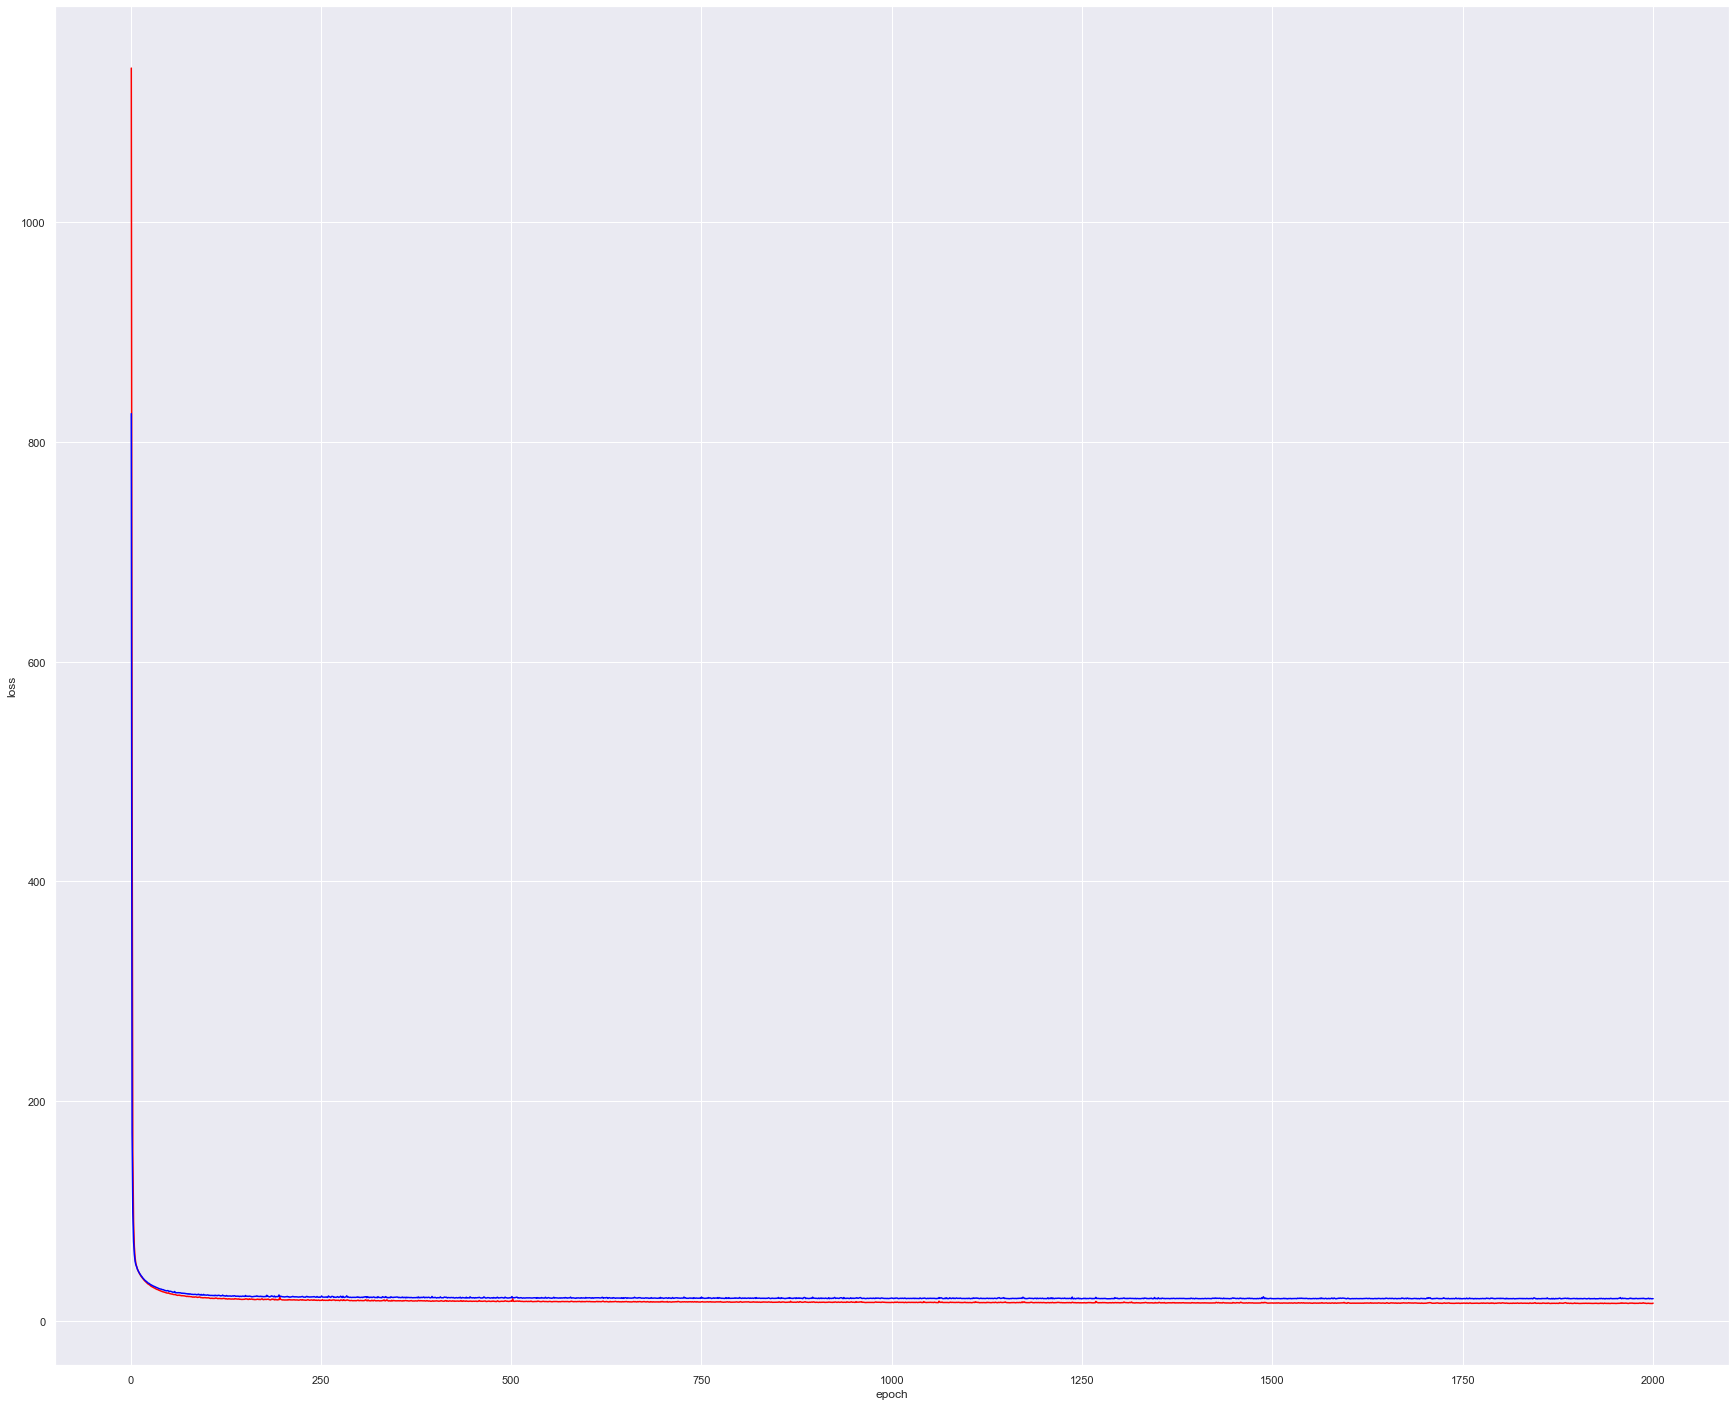

In [326]:
### fit neural net with small number of units and not much L2 regularization

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout, Dense

#make model
lp2pen = 0.1
#nx = x_train.shape
nn1 = models.Sequential()
nn1.add(layers.Dense(units=500,activation='relu',kernel_regularizer = regularizers.l2(lp2pen),input_shape=(X_train.shape[1],)))
#nn1.add(Dropout(0.2))
nn1.add(layers.Dense(units=100,activation='relu',kernel_regularizer = regularizers.l2(lp2pen)))
#nn1.add(Dropout(0.2))
nn1.add(layers.Dense(units=20,activation='relu',kernel_regularizer = regularizers.l2(lp2pen)))
#nn1.add(layers.Dense(units=50,activation='linear',kernel_regularizer = regularizers.l2(lp2pen)))
#nn1.add(Dropout(0.2))
#nn1.add(layers.Dense(units=20,activation='relu',kernel_regularizer = regularizers.l2(lp2pen)))
#nn1.add(Dropout(0.2))
#nn1.add(layers.Dense(units=10,activation='relu',kernel_regularizer = regularizers.l2(lp2pen)))
#nn1.add(Dropout(0.2))
#nn1.add(layers.Dense(units=5,activation='linear',kernel_regularizer = regularizers.l2(lp2pen)))
nn1.add(layers.Dense(units=1))

#compile model
nn1.compile(loss='mse',optimizer='adam',metrics=['mse'])

# fit
nhist = nn1.fit(X_train,y_train,epochs=2000,verbose=2,batch_size=1000,validation_data=(X_test,y_test))

### plot training by epoch
trL = nhist.history['loss']
teL = nhist.history['val_loss']
epind = range(1,len(trL)+1)
plt.plot(epind,trL,c='red')
plt.plot(epind,teL,c='blue')
plt.xlabel('epoch'); plt.ylabel('loss')

In [327]:
nn1.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 500)               19000     
_________________________________________________________________
dense_84 (Dense)             (None, 100)               50100     
_________________________________________________________________
dense_85 (Dense)             (None, 20)                2020      
_________________________________________________________________
dense_86 (Dense)             (None, 1)                 21        
Total params: 71,141
Trainable params: 71,141
Non-trainable params: 0
_________________________________________________________________


In [328]:
yhat_NN = nn1.predict(X_test)

print('r2 score is for NN model is ',r2_score(y_test,yhat_NN))
print('RMSE for NN model is ',mean_squared_error(y_test,yhat_NN))

r2 score is for NN model is  0.943827148782511
RMSE for NN model is  18.15079716117294


In [247]:
print(y_test[0:10])
print(yhat_NN[0:10])

[30.995 42.    25.795 10.8   12.99  62.981 36.998 33.97   6.994 10.99 ]
[[33.99923 ]
 [34.422802]
 [28.633488]
 [ 9.994049]
 [ 8.939339]
 [65.73964 ]
 [38.09866 ]
 [40.795444]
 [ 8.424758]
 [10.797693]]


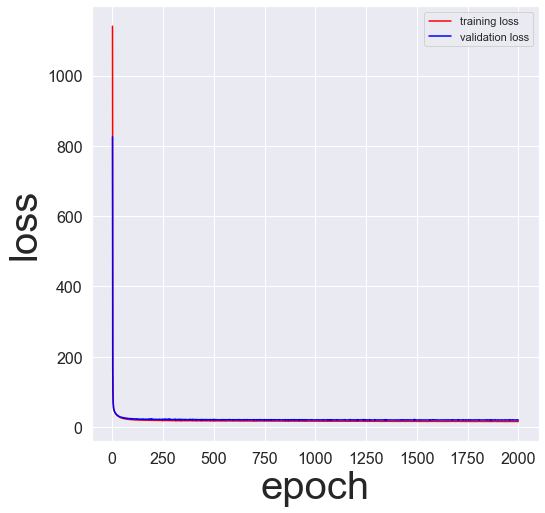

In [332]:
### plot training by epoch
plt.figure(figsize=(8,8))
trL = nhist.history['loss']
teL = nhist.history['val_loss']
epind = range(1,len(trL)+1)
plt.plot(epind,trL,c='red')
plt.plot(epind,teL,c='blue')
plt.xlabel('epoch', fontsize = 40); plt.ylabel('loss', fontsize = 40)

plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.legend(['training loss','validation loss'])
plt.savefig("NN_loss.png",bbox_inches='tight')

plt.show()

In [249]:
from ann_visualizer.visualize import ann_viz;

NN_fig = ann_viz(nn1, title="My first neural network")

In [226]:
nhist.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

## Gradient Boosting

In [227]:
#from sklearn.ensemble import GradientBoostingRegressor

#gbm = GradientBoostingRegressor(learning_rate=.2,n_estimators=5000,max_depth=4)

#gbm.fit(x1,y1)
#yhgb = gbm.predict(x2)

In [314]:
from sklearn.ensemble import GradientBoostingRegressor

#gbm = GradientBoostingRegressor(learning_rate=.05,n_estimators=400,max_depth=5)
gbm = GradientBoostingRegressor(learning_rate=.01)

# hyperparamter values to try in the gid search
param_grid={'n_estimators' : [10,50,100,200,300,400,500], 'max_depth': [3,4,5,6,7]}

# grid  is the grid searh object
grid = GridSearchCV(gbm,param_grid,cv=10,scoring='neg_mean_squared_error',n_jobs = 28)

grid.fit(X_train,y_train)

grid.best_params_ #best value from grid
grid.best_index_ # index of best value from grid
#check
print(grid.best_params_)

{'max_depth': 5, 'n_estimators': 500}


In [316]:
gbm = GradientBoostingRegressor(learning_rate=.05,n_estimators=grid.best_params_['n_estimators'],max_depth=grid.best_params_['max_depth'])

gbm.fit(X_train,y_train)

yhat_GB = gbm.predict(X_test)

print('r2 score is for GB model is ',r2_score(y_test,yhat_GB))
print('RMSE on the test for GB model is ',mean_squared_error(y_test,yhat_GB))

r2 score is for GB model is  0.9444262552959254
RMSE on the test for GB model is  17.95721145976678
